# Introduction
---
---
---
This notebook **documents every analytical process, observations, and key insights found from this investigation**. We used three independent datasets to examine if patterns found in **COVID-19 outcomes correspond with underlying cancer mortality and demographic factors**. The goal is **identify potential associations and conditions that may influence COVID-19 outcomes** from 01-21-2020 to 12-04-2020 down to the county level in the US.

This file will go through the stages of **loading, consolidating, pivoting, and visualizing data** and return all the necessary information we need to understand what our data is telling us. To help navigate our notebook easier, this file is sectioned into 3 primary stages required for the entire investigation, along their steps.

### 1. Getting Data
 - Loading Data
 - Merging Data
### 2. Data Preparation
- Cleaning Data
- Filtering Data
    - Repeat the first 2 steps for every merging process
- Aggregating Data
- Augmenting Data
### 3. EDA
- Data Visualization
- Pivoting

### Go to Conclusion > Summary for everything we need to know for the final report and presentation.

# Getting Data - Loading and Merging Datasets
---
---
---
## Loading Data
---


Pathlib is used to make loading datasets OS-independent. A couple helper functions were used to ensure the loading process is simple and reliable and merging datasets is smoother.

```python
def load_file(str: <filename>):
    # Gets the current working directory
    current_dir = Path.cwd()
    # This line is what makes the loading process OS-independent
    file_path = current_dir / <filename>
```
`Path.exists()` is used to check if Python found the file and returns a boolean output. If returned false, `load_file()` will return an error messsage.

### `rename()` method
```python
df.rename(columns={original_name: new_name},  inplace=False)
```
inplace=True will modify the dataframe directly without assigning another dataframe


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as axs
from pathlib import Path


# Helper functions
def load_file(filename):
    """
    Function that loads a CSV file into a pandas DataFrame.
    Uses pathlib to handle file paths, making it OS-independent and easier to loading file inputs.
    """
    # 1. Get the current working directory
    current_dir = Path.cwd()

    # 2. Point to the existing file we found earlier
    file_path = current_dir / filename

    # 3. Load the data
    if file_path.exists():
        df = pd.read_csv(file_path)
        print(f"{file_path} loaded successfully.")
        
        # 4. Show the first 5 rows to confirm it looks right
        display(df.head()) 
        return df
    else:
        print(f"Error: Cannot load {file_path}. Check the file path and try again.")

def capitalize_columns(df):
    """
    Function that capitalizes column names only containing lowercase characters without changing the order of the columns.
    An exception is made for any non-fully capitalized FIPS column, which is renamed to 'FIPS'.
    In this case, 'fips' from demo_df was changed to 'FIPS'.
    """
    # Count of any modified column names. Count of 0 will print a message 'All column names are valid.'
    capitalized = 0
    
    # Iterates through columns (left >> right)
    # Capitalizes any lowercase columns and 
    for col in df.columns:
        # Finds any columns supporting FIPS data (in this case, 'FIPS' ignoring capitalizations)
        if col.lower() == "fips" and col != "FIPS":
            df.rename(columns={col: "FIPS"}, inplace=True)
            capitalized += 1
            print(f"Renamed column '{col}' to 'FIPS'")
        # If the column name is lowercase, it will be capitalized to rename     
        if col.islower() and col.lower() != "fips":
            new_name = col.capitalize()
            df.rename(columns={col: new_name}, inplace=True)
            capitalized += 1
            print(f"Renamed column '{col}' to '{new_name}'")
    if capitalized == 0: print("All column names are valid.")
    
    return df

# Load CSV files, convert them to DataFrames, and store them in variables
demo_df = load_file("county_demographics.csv")
capitalize_columns(demo_df)
covid_us_df = load_file("covid19_usa.csv")
capitalize_columns(covid_us_df)
covid_counties_df = load_file("us_counties_covid19_daily.csv")
capitalize_columns(covid_counties_df)

/Users/rintakubo/src/CS17600/CS176_Project/county_demographics.csv loaded successfully.


,County,State,State FIPS Code,County FIPS Code,FIPS,Total Population,Male Population,Female Population,Total Race Responses,White Alone,Black or African American Alone,Hispanic or Latino
0,Autauga County,Alabama,1,1,1001,59285,28669,30616,59285,43616,11829,2188
1,Baldwin County,Alabama,1,3,1003,239945,117316,122629,239945,198721,19144,13393
2,Barbour County,Alabama,1,5,1005,24757,12906,11851,24757,10891,11616,1490
3,Bibb County,Alabama,1,7,1007,22152,11824,10328,22152,16634,4587,744
4,Blount County,Alabama,1,9,1009,59292,29934,29358,59292,53062,747,5962


All column names are valid.
/Users/rintakubo/src/CS17600/CS176_Project/covid19_usa.csv loaded successfully.


,index,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,0,United States,0,No,46,45.9,46.1,"157,376",falling,-2.4,-2.6,-2.2
1,1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4
3,3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,**,**,**,**
4,4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8


Renamed column 'index' to 'Index'
/Users/rintakubo/src/CS17600/CS176_Project/us_counties_covid19_daily.csv loaded successfully.


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


Renamed column 'date' to 'Date'
Renamed column 'county' to 'County'
Renamed column 'state' to 'State'
Renamed column 'fips' to 'FIPS'
Renamed column 'cases' to 'Cases'
Renamed column 'deaths' to 'Deaths'


,Date,County,State,FIPS,Cases,Deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
800432,2020-12-05,Sweetwater,Wyoming,56037.0,2098,10.0
800433,2020-12-05,Teton,Wyoming,56039.0,1739,2.0
800434,2020-12-05,Uinta,Wyoming,56041.0,1187,5.0
800435,2020-12-05,Washakie,Wyoming,56043.0,519,8.0


## Merging Data

---

The next cell performs Data Integration, linking the time-series COVID-19 data with the static demographic data. The Federal Information Processing Standards (FIPS) code will be used as the common key to create a single, unified DataFrame ready for analysis.

### The Merge Code Block

The `pd.merge()` function is used, acting exactly like an SQL LEFT JOIN.

```python
merged_df = pd.merge(
    left=covid_us_df,             # The primary DataFrame
    right=covid_counties_df,     # The secondary DataFrame
    on=['FIPS']                 # The common key that will be used to merge
    how='left'                 # Specifies a Left Join
)

In [2]:
merged_df = pd.merge(covid_us_df, covid_counties_df, on=['FIPS'], suffixes=('_left', '_right'), how="left")
capitalize_columns(merged_df)

All column names are valid.


,Index,County_left,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend,Date,County_right,State,Cases,Deaths
0,0,United States,0,No,46,45.9,46.1,"157,376",falling,-2.4,-2.6,-2.2,NaN,NaN,NaN,NaN,NaN
1,1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6,2020-04-04,Perry,Kentucky,2.0,0.0
2,1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6,2020-04-05,Perry,Kentucky,3.0,0.0
3,1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6,2020-04-06,Perry,Kentucky,3.0,0.0
4,1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6,2020-04-07,Perry,Kentucky,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773728,3140,"Ziebach County, South Dakota",46137,*,*,*,*,*,**,**,**,**,2020-12-01,Ziebach,South Dakota,207.0,7.0
773729,3140,"Ziebach County, South Dakota",46137,*,*,*,*,*,**,**,**,**,2020-12-02,Ziebach,South Dakota,209.0,7.0
773730,3140,"Ziebach County, South Dakota",46137,*,*,*,*,*,**,**,**,**,2020-12-03,Ziebach,South Dakota,229.0,7.0
773731,3140,"Ziebach County, South Dakota",46137,*,*,*,*,*,**,**,**,**,2020-12-04,Ziebach,South Dakota,237.0,7.0


# Data Preparation
---
---
---
## Cleaning Data
---

This process requires for the removal of unnecessary/irrelevant columns, grouping data by columns, and augmenting missing data. Our goal is to minimize the size of our dataset while retaining all of the necessary information before beginning our analysis phase. Reducing datasize helps preserve computing resources and improves efficiency when handling large files during analysis.

merged_df will be used to clean everything up. So far, the following was achieved for this Dataframe:
1. Successfully load each individual datasets to Python
2. Correct the capitalization for each column to allow for efficient process of merging
3. Merge datasets by a common shared key (FIPS)


```python
df_merged.drop(columns=[LIST_OF_COLUMNS_TO_REMOVE], inplace=True)   # Drop method is performed to remove unnecessary columns
```
### `drop()` method
```python
DataFrame.drop(labels=None, *, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
# axis=0 - rows, treats each column as a separate entity (default)
# axis=1 - horizontal, operation is performed across each row
# level parameter - 

## Removing Unnecessary Data
---

### pd.duplicated()
Checks for duplicates. It returns 0, which is exactly what we need when dealing with a time-series dataframe. This indicates that the raw data has no detectible data-entry or formatting errors.

In [3]:
print("Number of duplicated rows:", merged_df.duplicated().sum())

Number of duplicated rows: 0


In [4]:
# Displaying column names to easily choose and extract what columns will be removed in the next cell
merged_df.columns.tolist()

['Index',
 'County_left',
 'FIPS',
 'Met Objective of 45.5? (1)',
 'Age-Adjusted Death Rate',
 'Lower 95% Confidence Interval for Death Rate',
 'Upper 95% Confidence Interval for Death Rate',
 'Average Deaths per Year',
 'Recent Trend (2)',
 'Recent 5-Year Trend (2) in Death Rates',
 'Lower 95% Confidence Interval for Trend',
 'Upper 95% Confidence Interval for Trend',
 'Date',
 'County_right',
 'State',
 'Cases',
 'Deaths']

### Dropping and Renaming Columns

In [5]:
columns_to_drop = ['Index', 'County_left', 'Met Objective of 45.5? (1)', 'Age-Adjusted Death Rate', 'Lower 95% Confidence Interval for Death Rate', 'Recent 5-Year Trend (2) in Death Rates', 'Recent Trend (2)', 'Lower 95% Confidence Interval for Trend', 'Upper 95% Confidence Interval for Trend']
columns_to_rename = ['Upper 95% Confidence Interval for Death Rate', 'Average Deaths per Year', 'County_right', 'Cases', 'Deaths']
renamed_columns = ['Upper 95% CI for Death Rate', 'Avg Deaths per Year (Cancer)', 'County', 'COVID Cases', 'Total Deaths (COVID)']

# Drop unnecessary columns
merged_df.drop(columns=columns_to_drop, inplace=True)
print('Dropped the following columns:\n' + ",\n".join(columns_to_drop))
print()

# Rename columns for clarity
merged_df.rename(columns=dict(zip(columns_to_rename, renamed_columns)), inplace=True)
for original, renamed in dict(zip(columns_to_rename, renamed_columns)).items():
    print(f"Renamed column '{original}' to '{renamed}'")
print()

# Replace invalid data entries with NaN ('*' and '')
columns_to_replace = ['Upper 95% CI for Death Rate', 'Avg Deaths per Year (Cancer)']
merged_df[columns_to_replace] = merged_df[columns_to_replace].replace({'*': np.nan, '': np.nan})
merged_df

# Convert 'Date' column to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format="%Y-%m-%d")
print("'Date' Column Type:", merged_df['Date'].dtype)

Dropped the following columns:
Index,
County_left,
Met Objective of 45.5? (1),
Age-Adjusted Death Rate,
Lower 95% Confidence Interval for Death Rate,
Recent 5-Year Trend (2) in Death Rates,
Recent Trend (2),
Lower 95% Confidence Interval for Trend,
Upper 95% Confidence Interval for Trend

Renamed column 'Upper 95% Confidence Interval for Death Rate' to 'Upper 95% CI for Death Rate'
Renamed column 'Average Deaths per Year' to 'Avg Deaths per Year (Cancer)'
Renamed column 'County_right' to 'County'
Renamed column 'Cases' to 'COVID Cases'
Renamed column 'Deaths' to 'Total Deaths (COVID)'

'Date' Column Type: datetime64[ns]


In [6]:
merged_df

,FIPS,Upper 95% CI for Death Rate,Avg Deaths per Year (Cancer),Date,County,State,COVID Cases,Total Deaths (COVID)
0,0,46.1,"157,376",NaT,NaN,NaN,NaN,NaN
1,21193,144.2,43,2020-04-04,Perry,Kentucky,2.0,0.0
2,21193,144.2,43,2020-04-05,Perry,Kentucky,3.0,0.0
3,21193,144.2,43,2020-04-06,Perry,Kentucky,3.0,0.0
4,21193,144.2,43,2020-04-07,Perry,Kentucky,3.0,0.0
...,...,...,...,...,...,...,...,...
773728,46137,NaN,NaN,2020-12-01,Ziebach,South Dakota,207.0,7.0
773729,46137,NaN,NaN,2020-12-02,Ziebach,South Dakota,209.0,7.0
773730,46137,NaN,NaN,2020-12-03,Ziebach,South Dakota,229.0,7.0
773731,46137,NaN,NaN,2020-12-04,Ziebach,South Dakota,237.0,7.0


## Repeating the Process
---
Another dataframe will be merged. After this, our dataframe will feature health-related statistics and demographic information in one consolidated table.

In [7]:
merged_df = merged_df.merge(demo_df, on='FIPS', how='left', suffixes=('_left', ''))
uncleaned_df = merged_df.copy()
merged_df

,FIPS,Upper 95% CI for Death Rate,Avg Deaths per Year (Cancer),Date,County_left,State_left,COVID Cases,Total Deaths (COVID),County,State,State FIPS Code,County FIPS Code,Total Population,Male Population,Female Population,Total Race Responses,White Alone,Black or African American Alone,Hispanic or Latino
0,0,46.1,"157,376",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21193,144.2,43,2020-04-04,Perry,Kentucky,2.0,0.0,Perry County,Kentucky,21.0,193.0,27847.0,13758.0,14089.0,27847.0,26274.0,276.0,90.0
2,21193,144.2,43,2020-04-05,Perry,Kentucky,3.0,0.0,Perry County,Kentucky,21.0,193.0,27847.0,13758.0,14089.0,27847.0,26274.0,276.0,90.0
3,21193,144.2,43,2020-04-06,Perry,Kentucky,3.0,0.0,Perry County,Kentucky,21.0,193.0,27847.0,13758.0,14089.0,27847.0,26274.0,276.0,90.0
4,21193,144.2,43,2020-04-07,Perry,Kentucky,3.0,0.0,Perry County,Kentucky,21.0,193.0,27847.0,13758.0,14089.0,27847.0,26274.0,276.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773728,46137,NaN,NaN,2020-12-01,Ziebach,South Dakota,207.0,7.0,Ziebach County,South Dakota,46.0,137.0,2410.0,1192.0,1218.0,2410.0,657.0,0.0,30.0
773729,46137,NaN,NaN,2020-12-02,Ziebach,South Dakota,209.0,7.0,Ziebach County,South Dakota,46.0,137.0,2410.0,1192.0,1218.0,2410.0,657.0,0.0,30.0
773730,46137,NaN,NaN,2020-12-03,Ziebach,South Dakota,229.0,7.0,Ziebach County,South Dakota,46.0,137.0,2410.0,1192.0,1218.0,2410.0,657.0,0.0,30.0
773731,46137,NaN,NaN,2020-12-04,Ziebach,South Dakota,237.0,7.0,Ziebach County,South Dakota,46.0,137.0,2410.0,1192.0,1218.0,2410.0,657.0,0.0,30.0


### Filling Missing Values

In [8]:
# Checks for null values in each column of the merged dataframe
merged_df.isnull().sum()

FIPS                                   0
Upper 95% CI for Death Rate        65101
Avg Deaths per Year (Cancer)       65101
Date                                  14
County_left                           14
State_left                            14
COVID Cases                           14
Total Deaths (COVID)                  14
County                              2344
State                               2344
State FIPS Code                     2344
County FIPS Code                    2344
Total Population                    2344
Male Population                     2344
Female Population                   2344
Total Race Responses                2344
White Alone                         2344
Black or African American Alone     2344
Hispanic or Latino                  2344
dtype: int64

In [9]:
columns_to_drop2 = ['County_left', 'State_left', 'State FIPS Code', 'County FIPS Code', 'Total Race Responses']
merged_df.drop(columns=columns_to_drop2, inplace=True)
# Final merged dataset
merged_df

,FIPS,Upper 95% CI for Death Rate,Avg Deaths per Year (Cancer),Date,COVID Cases,Total Deaths (COVID),County,State,Total Population,Male Population,Female Population,White Alone,Black or African American Alone,Hispanic or Latino
0,0,46.1,"157,376",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21193,144.2,43,2020-04-04,2.0,0.0,Perry County,Kentucky,27847.0,13758.0,14089.0,26274.0,276.0,90.0
2,21193,144.2,43,2020-04-05,3.0,0.0,Perry County,Kentucky,27847.0,13758.0,14089.0,26274.0,276.0,90.0
3,21193,144.2,43,2020-04-06,3.0,0.0,Perry County,Kentucky,27847.0,13758.0,14089.0,26274.0,276.0,90.0
4,21193,144.2,43,2020-04-07,3.0,0.0,Perry County,Kentucky,27847.0,13758.0,14089.0,26274.0,276.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773728,46137,NaN,NaN,2020-12-01,207.0,7.0,Ziebach County,South Dakota,2410.0,1192.0,1218.0,657.0,0.0,30.0
773729,46137,NaN,NaN,2020-12-02,209.0,7.0,Ziebach County,South Dakota,2410.0,1192.0,1218.0,657.0,0.0,30.0
773730,46137,NaN,NaN,2020-12-03,229.0,7.0,Ziebach County,South Dakota,2410.0,1192.0,1218.0,657.0,0.0,30.0
773731,46137,NaN,NaN,2020-12-04,237.0,7.0,Ziebach County,South Dakota,2410.0,1192.0,1218.0,657.0,0.0,30.0


## Filtering Data
---
This process filters the dataset **only include data within the dates of 1/20/2020 to 12/04/2020**. The following cell will output the date range of the dataset, along with the filtered dataframe.

``` python
new_df = original_df.loc[(<date_column >= start_date) & (<date_column> <= end_date>)]
# This returns a new dataframe that contains rows from the original dataframe that is within the date range.

In [10]:
start_date = merged_df['Date'].min()
end_date = pd.Timestamp('2020-12-04')

print(f"Date Range: {start_date} to {end_date}")

filtered_df = merged_df.loc[(merged_df['Date'] >= start_date) & (merged_df['Date'] <= end_date)]
filtered_df

Date Range: 2020-01-21 00:00:00 to 2020-12-04 00:00:00


,FIPS,Upper 95% CI for Death Rate,Avg Deaths per Year (Cancer),Date,COVID Cases,Total Deaths (COVID),County,State,Total Population,Male Population,Female Population,White Alone,Black or African American Alone,Hispanic or Latino
1,21193,144.2,43,2020-04-04,2.0,0.0,Perry County,Kentucky,27847.0,13758.0,14089.0,26274.0,276.0,90.0
2,21193,144.2,43,2020-04-05,3.0,0.0,Perry County,Kentucky,27847.0,13758.0,14089.0,26274.0,276.0,90.0
3,21193,144.2,43,2020-04-06,3.0,0.0,Perry County,Kentucky,27847.0,13758.0,14089.0,26274.0,276.0,90.0
4,21193,144.2,43,2020-04-07,3.0,0.0,Perry County,Kentucky,27847.0,13758.0,14089.0,26274.0,276.0,90.0
5,21193,144.2,43,2020-04-08,3.0,0.0,Perry County,Kentucky,27847.0,13758.0,14089.0,26274.0,276.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773727,46137,NaN,NaN,2020-11-30,207.0,7.0,Ziebach County,South Dakota,2410.0,1192.0,1218.0,657.0,0.0,30.0
773728,46137,NaN,NaN,2020-12-01,207.0,7.0,Ziebach County,South Dakota,2410.0,1192.0,1218.0,657.0,0.0,30.0
773729,46137,NaN,NaN,2020-12-02,209.0,7.0,Ziebach County,South Dakota,2410.0,1192.0,1218.0,657.0,0.0,30.0
773730,46137,NaN,NaN,2020-12-03,229.0,7.0,Ziebach County,South Dakota,2410.0,1192.0,1218.0,657.0,0.0,30.0


### Data Type Error Fix
We ran into inconsistent data types, particularly from the *'Avg Deaths per Year (Cancer)'* column. The values from the column were truncated to a float data type.

In [11]:
column_types = filtered_df.dtypes
print("Column Data Types Before:\n" + str(column_types))
filtered_df['Avg Deaths per Year (Cancer)'] = filtered_df['Avg Deaths per Year (Cancer)'].str.replace(',', '').astype(float)

column_types = filtered_df.dtypes
print("Column Data Types After:\n" + str(column_types))
filtered_df

Column Data Types Before:
FIPS                                        int64
Upper 95% CI for Death Rate                object
Avg Deaths per Year (Cancer)               object
Date                               datetime64[ns]
COVID Cases                               float64
Total Deaths (COVID)                      float64
County                                     object
State                                      object
Total Population                          float64
Male Population                           float64
Female Population                         float64
White Alone                               float64
Black or African American Alone           float64
Hispanic or Latino                        float64
dtype: object
Column Data Types After:
FIPS                                        int64
Upper 95% CI for Death Rate                object
Avg Deaths per Year (Cancer)              float64
Date                               datetime64[ns]
COVID Cases                        

/var/folders/fc/_2l681p52m98dmwfmr_30w2h0000gn/T/ipykernel_35382/1812655152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Avg Deaths per Year (Cancer)'] = filtered_df['Avg Deaths per Year (Cancer)'].str.replace(',', '').astype(float)


,FIPS,Upper 95% CI for Death Rate,Avg Deaths per Year (Cancer),Date,COVID Cases,Total Deaths (COVID),County,State,Total Population,Male Population,Female Population,White Alone,Black or African American Alone,Hispanic or Latino
1,21193,144.2,43.0,2020-04-04,2.0,0.0,Perry County,Kentucky,27847.0,13758.0,14089.0,26274.0,276.0,90.0
2,21193,144.2,43.0,2020-04-05,3.0,0.0,Perry County,Kentucky,27847.0,13758.0,14089.0,26274.0,276.0,90.0
3,21193,144.2,43.0,2020-04-06,3.0,0.0,Perry County,Kentucky,27847.0,13758.0,14089.0,26274.0,276.0,90.0
4,21193,144.2,43.0,2020-04-07,3.0,0.0,Perry County,Kentucky,27847.0,13758.0,14089.0,26274.0,276.0,90.0
5,21193,144.2,43.0,2020-04-08,3.0,0.0,Perry County,Kentucky,27847.0,13758.0,14089.0,26274.0,276.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773727,46137,NaN,NaN,2020-11-30,207.0,7.0,Ziebach County,South Dakota,2410.0,1192.0,1218.0,657.0,0.0,30.0
773728,46137,NaN,NaN,2020-12-01,207.0,7.0,Ziebach County,South Dakota,2410.0,1192.0,1218.0,657.0,0.0,30.0
773729,46137,NaN,NaN,2020-12-02,209.0,7.0,Ziebach County,South Dakota,2410.0,1192.0,1218.0,657.0,0.0,30.0
773730,46137,NaN,NaN,2020-12-03,229.0,7.0,Ziebach County,South Dakota,2410.0,1192.0,1218.0,657.0,0.0,30.0


### Removing 

In [12]:
subset = ['Total Population']
print("Column before dropping NaN:", len(filtered_df))
filtered_df.dropna(subset=subset, inplace=True)
print("Column after dropping NaN:", len(filtered_df))

Column before dropping NaN: 770592
Column after dropping NaN: 768264


/var/folders/fc/_2l681p52m98dmwfmr_30w2h0000gn/T/ipykernel_35382/1108736916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(subset=subset, inplace=True)


## Sorting Values
---
This will allow our dataset to be grouped by rows, then date. When we aggregate data, the `groupby()` function will be used to get each county with the last available date, which will be useful for creating a cumulative summary of each county, state, and the US.

In [13]:
filtered_df.sort_values(by=['FIPS', 'Date'], inplace=True)

filtered_df.head()

/var/folders/fc/_2l681p52m98dmwfmr_30w2h0000gn/T/ipykernel_35382/1035473459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(by=['FIPS', 'Date'], inplace=True)


,FIPS,Upper 95% CI for Death Rate,Avg Deaths per Year (Cancer),Date,COVID Cases,Total Deaths (COVID),County,State,Total Population,Male Population,Female Population,White Alone,Black or African American Alone,Hispanic or Latino
206767,1001,69.2,34.0,2020-03-24,1.0,0.0,Autauga County,Alabama,59285.0,28669.0,30616.0,43616.0,11829.0,2188.0
206768,1001,69.2,34.0,2020-03-25,4.0,0.0,Autauga County,Alabama,59285.0,28669.0,30616.0,43616.0,11829.0,2188.0
206769,1001,69.2,34.0,2020-03-26,6.0,0.0,Autauga County,Alabama,59285.0,28669.0,30616.0,43616.0,11829.0,2188.0
206770,1001,69.2,34.0,2020-03-27,6.0,0.0,Autauga County,Alabama,59285.0,28669.0,30616.0,43616.0,11829.0,2188.0
206771,1001,69.2,34.0,2020-03-28,6.0,0.0,Autauga County,Alabama,59285.0,28669.0,30616.0,43616.0,11829.0,2188.0


In [14]:
county_df.loc[county_df['FIPS'] == 18157]

NameError: name 'county_df' is not defined

In [ ]:
filtered_presentation_df = filtered_df[['FIPS', 'Date', 'County', 'State']]
filtered_presentation_df

,FIPS,Date,County,State
206767,1001,2020-03-24,Autauga County,Alabama
206768,1001,2020-03-25,Autauga County,Alabama
206769,1001,2020-03-26,Autauga County,Alabama
206770,1001,2020-03-27,Autauga County,Alabama
206771,1001,2020-03-28,Autauga County,Alabama
...,...,...,...,...
535523,56045,2020-11-30,Weston County,Wyoming
535524,56045,2020-12-01,Weston County,Wyoming
535525,56045,2020-12-02,Weston County,Wyoming
535526,56045,2020-12-03,Weston County,Wyoming


### `time_series_df`
This is the last cleaned dataframe that contains all of the original data, including the date. Next step is data aggregation, which involves the process of erasing time series to get a general static information on each county and state, so a copy of filtered_df, `time_series_df` is made and used for conducting any time-based analysis during our EDA phase.

In [ ]:
time_series_df = filtered_df.copy()
display(time_series_df.dtypes)
# Already grouped by county, and the 'Date' column is in datetime format
time_series_df  # Final time series dataframe

FIPS                                        int64
Upper 95% CI for Death Rate                object
Avg Deaths per Year (Cancer)              float64
Date                               datetime64[ns]
COVID Cases                               float64
Total Deaths (COVID)                      float64
County                                     object
State                                      object
Total Population                          float64
Male Population                           float64
Female Population                         float64
White Alone                               float64
Black or African American Alone           float64
Hispanic or Latino                        float64
dtype: object

,FIPS,Upper 95% CI for Death Rate,Avg Deaths per Year (Cancer),Date,COVID Cases,Total Deaths (COVID),County,State,Total Population,Male Population,Female Population,White Alone,Black or African American Alone,Hispanic or Latino
206767,1001,69.2,34.0,2020-03-24,1.0,0.0,Autauga County,Alabama,59285.0,28669.0,30616.0,43616.0,11829.0,2188.0
206768,1001,69.2,34.0,2020-03-25,4.0,0.0,Autauga County,Alabama,59285.0,28669.0,30616.0,43616.0,11829.0,2188.0
206769,1001,69.2,34.0,2020-03-26,6.0,0.0,Autauga County,Alabama,59285.0,28669.0,30616.0,43616.0,11829.0,2188.0
206770,1001,69.2,34.0,2020-03-27,6.0,0.0,Autauga County,Alabama,59285.0,28669.0,30616.0,43616.0,11829.0,2188.0
206771,1001,69.2,34.0,2020-03-28,6.0,0.0,Autauga County,Alabama,59285.0,28669.0,30616.0,43616.0,11829.0,2188.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535523,56045,68.6,4.0,2020-11-30,397.0,1.0,Weston County,Wyoming,6835.0,3729.0,3106.0,5865.0,4.0,238.0
535524,56045,68.6,4.0,2020-12-01,409.0,2.0,Weston County,Wyoming,6835.0,3729.0,3106.0,5865.0,4.0,238.0
535525,56045,68.6,4.0,2020-12-02,415.0,2.0,Weston County,Wyoming,6835.0,3729.0,3106.0,5865.0,4.0,238.0
535526,56045,68.6,4.0,2020-12-03,419.0,2.0,Weston County,Wyoming,6835.0,3729.0,3106.0,5865.0,4.0,238.0


## Aggregating Data
---
### (Grouped Using FIPS)

This cell groups the dataset by FIPS to produce one aggregated row per county. Static county attributes, such as demographic variables and cancer estimates, are taken from the first available record since they remain unchanged overtime. COVID-related fields are cumulative counts, meaning we will use the last available date to 

To achieve this, the dataframe was sorted by FIPS, then Date. The print statements confirm the column structure and verify that the number of rows matches the number of unique FIPS codes. This also confirms that there are no duplicated rows so far.

In [ ]:
county_df = (filtered_df.groupby('FIPS', as_index=False).agg(
    {
        # Keep one copy per county. Each county information is static
        'County': 'first',
        'State': 'first',
        'Total Population': 'first',
        'Male Population': 'first',
        'Female Population': 'first',
        'White Alone': 'first',
        'Black or African American Alone': 'first',
        'Hispanic or Latino': 'first',

        # Cancer info is static per county
        'Avg Deaths per Year (Cancer)': 'first',
        'Upper 95% CI for Death Rate': 'first',

        # COVID columns are cumulative so max is used to find the total cases and deaths
        'COVID Cases': 'max',
        'Total Deaths (COVID)': 'max'
    }
    )
)

print(county_df.columns)
print('Unique Rows:', county_df['FIPS'].nunique())
print('Total Rows:', len(county_df))
# NOT A TIME SERIES TABLE
# Not final
county_df

Index(['FIPS', 'County', 'State', 'Total Population', 'Male Population',
       'Female Population', 'White Alone', 'Black or African American Alone',
       'Hispanic or Latino', 'Avg Deaths per Year (Cancer)',
       'Upper 95% CI for Death Rate', 'COVID Cases', 'Total Deaths (COVID)'],
      dtype='object')
Unique Rows: 3118
Total Rows: 3118


,FIPS,County,State,Total Population,Male Population,Female Population,White Alone,Black or African American Alone,Hispanic or Latino,Avg Deaths per Year (Cancer),Upper 95% CI for Death Rate,COVID Cases,Total Deaths (COVID)
0,1001,Autauga County,Alabama,59285.0,28669.0,30616.0,43616.0,11829.0,2188.0,34.0,69.2,2945.0,42.0
1,1003,Baldwin County,Alabama,239945.0,117316.0,122629.0,198721.0,19144.0,13393.0,121.0,52,9501.0,138.0
2,1005,Barbour County,Alabama,24757.0,12906.0,11851.0,10891.0,11616.0,1490.0,20.0,75,1217.0,29.0
3,1007,Bibb County,Alabama,22152.0,11824.0,10328.0,16634.0,4587.0,744.0,17.0,84.1,1270.0,38.0
4,1009,Blount County,Alabama,59292.0,29934.0,29358.0,53062.0,747.0,5962.0,43.0,68.6,3231.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113,56037,Sweetwater County,Wyoming,41786.0,21396.0,20390.0,34434.0,498.0,6924.0,9.0,38.1,2077.0,10.0
3114,56039,Teton County,Wyoming,23358.0,12298.0,11060.0,18793.0,137.0,3445.0,5.0,43.9,1724.0,2.0
3115,56041,Uinta County,Wyoming,20605.0,10399.0,10206.0,18743.0,53.0,2042.0,4.0,35,1175.0,5.0
3116,56043,Washakie County,Wyoming,7708.0,3871.0,3837.0,6364.0,14.0,1087.0,5.0,58.3,517.0,8.0


## Augmenting Data - Adding Standardized Metrics
---
###  Creating Per-Capita and Percentage Metrics and Rearranging Columns
The next cell generates several new analytical columns that convert raw counts into standardized rates and percentages, which makes comparisons across counties possible. This process is necessary due to raw values scaling with population size. The columns will be appended to the end of the dataframe alongside the original fields.

Initial report - "Accordingly, the dataset holds data about the estimated death rates per **100,000** people per county, and also the upper and lower values of the 95% confidence interval for the estimate."
Because the dataset reports values per 100,000 people, each county’s mortality rate is calculated by scaling the number of deaths to what it would be in a population of 100,000. 


$$
\text{Deaths per 100K} = \frac{\text{Number of deaths}}{\text{Total population}} \times 100{,}000
$$


```python
county_df[<Deaths per 100K>]   = (county_df[<Number of cases>] / county_df[<Total Population>]) * 100000
county_df[<Percentage>] = (county_df[<Demographic Population>] / county_df[<Total Population>]) * 100
```

After adding those columns to the dataframe, its columns are rearranged by grouped fields
```python
county_df = county_df[rearranged_columns]
```


In [119]:
county_df.columns.tolist()

['FIPS',
 'County',
 'State',
 'Total Population',
 'Male Population',
 'Female Population',
 'White Alone',
 'Black or African American Alone',
 'Hispanic or Latino',
 'Avg Deaths per Year (Cancer)',
 'Upper 95% CI for Death Rate',
 'COVID Cases',
 'Total Deaths (COVID)']

In [120]:
county_df['COVID Cases per 100K'] = (county_df['COVID Cases'] / county_df['Total Population']) * 100000
county_df['COVID Deaths per 100K'] = (county_df['Total Deaths (COVID)'] / county_df['Total Population']) * 100000
county_df['Cancer Deaths per 100K'] = (county_df['Avg Deaths per Year (Cancer)'] / county_df['Total Population']) * 100000

county_df['Male Pct (%)'] = (county_df['Male Population'] / county_df['Total Population']) * 100
county_df['Female Pct (%)'] = (county_df['Female Population'] / county_df['Total Population']) * 100
county_df['White Pct (%)'] = (county_df['White Alone'] / county_df['Total Population']) * 100
county_df['Black Pct (%)'] = (county_df['Black or African American Alone'] / county_df['Total Population']) * 100
county_df['Hispanic/Latino Pct (%)'] = (county_df['Hispanic or Latino'] / county_df['Total Population']) * 100
county_df['COVID Death Rate'] = (county_df['Total Deaths (COVID)'] / county_df['COVID Cases']) * 100

display(county_df.columns.tolist())

# Rearranging columns
original_order = [
 'FIPS',
 'County',
 'State',
 'Total Population',
 'Male Population',
 'Female Population',
 'White Alone',
 'Black or African American Alone',
 'Hispanic or Latino',
 'Avg Deaths per Year (Cancer)',
 'Upper 95% CI for Death Rate',
 'COVID Cases',
 'Total Deaths (COVID)',
 # New columns:
 'COVID Cases per 100K',
 'COVID Deaths per 100K',
 'Cancer Deaths per 100K',
 'Male Pct (%)',
 'Female Pct (%)',
 'White Pct (%)',
 'Black Pct (%)',
 'Hispanic/Latino Pct (%)',
 'COVID Death Rate']

rearranged_columns = [
 # Static geographic information
 'FIPS',
 'County',
 'State',
 # Static demographic information
 'Total Population',
 'Male Population',
 'Male Pct (%)',
 'Female Population',
 'Female Pct (%)',
 'White Alone',
 'White Pct (%)',
 'Black or African American Alone',
 'Black Pct (%)',
 'Hispanic or Latino',
 'Hispanic/Latino Pct (%)',
 # COVID information
 'Upper 95% CI for Death Rate',
 'COVID Cases',
 'Total Deaths (COVID)',
 'COVID Cases per 100K',
 'COVID Deaths per 100K',
 'COVID Death Rate',
 # Cancer information
 'Cancer Deaths per 100K',
 'Avg Deaths per Year (Cancer)']

county_df = county_df[rearranged_columns]

county_df

['FIPS',
 'County',
 'State',
 'Total Population',
 'Male Population',
 'Female Population',
 'White Alone',
 'Black or African American Alone',
 'Hispanic or Latino',
 'Avg Deaths per Year (Cancer)',
 'Upper 95% CI for Death Rate',
 'COVID Cases',
 'Total Deaths (COVID)',
 'COVID Cases per 100K',
 'COVID Deaths per 100K',
 'Cancer Deaths per 100K',
 'Male Pct (%)',
 'Female Pct (%)',
 'White Pct (%)',
 'Black Pct (%)',
 'Hispanic/Latino Pct (%)',
 'COVID Death Rate']

,FIPS,County,State,Total Population,Male Population,Male Pct (%),Female Population,Female Pct (%),White Alone,White Pct (%),...,Hispanic or Latino,Hispanic/Latino Pct (%),Upper 95% CI for Death Rate,COVID Cases,Total Deaths (COVID),COVID Cases per 100K,COVID Deaths per 100K,COVID Death Rate,Cancer Deaths per 100K,Avg Deaths per Year (Cancer)
0,1001,Autauga County,Alabama,59285.0,28669.0,48.357932,30616.0,51.642068,43616.0,73.570043,...,2188.0,3.690647,69.2,2945.0,42.0,4967.529729,70.844227,1.426146,57.350089,34.0
1,1003,Baldwin County,Alabama,239945.0,117316.0,48.892871,122629.0,51.107129,198721.0,82.819396,...,13393.0,5.581696,52,9501.0,138.0,3959.657421,57.513180,1.452479,50.428223,121.0
2,1005,Barbour County,Alabama,24757.0,12906.0,52.130711,11851.0,47.869289,10891.0,43.991598,...,1490.0,6.018500,75,1217.0,29.0,4915.781395,117.138587,2.382909,80.785232,20.0
3,1007,Bibb County,Alabama,22152.0,11824.0,53.376670,10328.0,46.623330,16634.0,75.090285,...,744.0,3.358613,84.1,1270.0,38.0,5733.116649,171.542073,2.992126,76.742506,17.0
4,1009,Blount County,Alabama,59292.0,29934.0,50.485732,29358.0,49.514268,53062.0,89.492680,...,5962.0,10.055319,68.6,3231.0,46.0,5449.301761,77.582136,1.423708,72.522431,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113,56037,Sweetwater County,Wyoming,41786.0,21396.0,51.203752,20390.0,48.796248,34434.0,82.405590,...,6924.0,16.570143,38.1,2077.0,10.0,4970.564304,23.931460,0.481464,21.538314,9.0
3114,56039,Teton County,Wyoming,23358.0,12298.0,52.650056,11060.0,47.349944,18793.0,80.456375,...,3445.0,14.748694,43.9,1724.0,2.0,7380.768901,8.562377,0.116009,21.405942,5.0
3115,56041,Uinta County,Wyoming,20605.0,10399.0,50.468333,10206.0,49.531667,18743.0,90.963358,...,2042.0,9.910216,35,1175.0,5.0,5702.499393,24.265955,0.425532,19.412764,4.0
3116,56043,Washakie County,Wyoming,7708.0,3871.0,50.220550,3837.0,49.779450,6364.0,82.563570,...,1087.0,14.102231,58.3,517.0,8.0,6707.317073,103.788272,1.547389,64.867670,5.0


### Correlation Between Cancer and COVID Mortality Rates
This cell computes the correlation between county-level cancer deaths per 100,000 residents and COVID deaths per 100,000 residents. By selecting only these two standardized rate variables and applying the `.corr()` method, the output shows how strongly the two mortality measures move together across counties. A positive value indicates that counties with higher cancer mortality also tend to have higher COVID mortality.

In [ ]:
county_df[['Cancer Deaths per 100K', 'COVID Deaths per 100K']].corr()

,Cancer Deaths per 100K,COVID Deaths per 100K
Cancer Deaths per 100K,1.000000,0.101773
COVID Deaths per 100K,0.101773,1.000000


It shows that cancer and COVID deaths have a weak relationship.

In [122]:
county_df.columns.to_list()

['FIPS',
 'County',
 'State',
 'Total Population',
 'Male Population',
 'Male Pct (%)',
 'Female Population',
 'Female Pct (%)',
 'White Alone',
 'White Pct (%)',
 'Black or African American Alone',
 'Black Pct (%)',
 'Hispanic or Latino',
 'Hispanic/Latino Pct (%)',
 'Upper 95% CI for Death Rate',
 'COVID Cases',
 'Total Deaths (COVID)',
 'COVID Cases per 100K',
 'COVID Deaths per 100K',
 'COVID Death Rate',
 'Cancer Deaths per 100K',
 'Avg Deaths per Year (Cancer)']

In [123]:
"""Doesn't work. Go back later to find why .agg() is not working"""
# state_df = county_df.groupby('State', as_index=False).agg(
#        {
#        'Avg Deaths per Year (Cancer)': 'sum',
#        'COVID Cases': 'sum',
#        'Total Deaths (COVID)': 'sum',
#        'Total Population': 'sum',
#        'Male Population': 'sum',
#        'Female Population': 'sum',
#        'White Alone': 'sum',
#        'Black or African American Alone': 'sum',
#        'Hispanic or Latino': 'sum'
#        }
# )

# state_df

"Doesn't work. Go back later to find why .agg() is not working"

**Every field in county_df is static except for percentages and case/mortality rates**. Each static field will be **summed by state**, and percentages and rates will be calculated from there.

In [ ]:
cols_to_sum = [
    'Avg Deaths per Year (Cancer)',
    'COVID Cases',
    'Total Deaths (COVID)',
    'Total Population',
    'Male Population',
    'Female Population',
    'White Alone',
    'Black or African American Alone',
    'Hispanic or Latino'
]

state_df = county_df.groupby('State', as_index=False)[cols_to_sum].sum()

state_df

,State,Avg Deaths per Year (Cancer),COVID Cases,Total Deaths (COVID),Total Population,Male Population,Female Population,White Alone,Black or African American Alone,Hispanic or Latino
0,Alabama,3186.0,264199.0,3835.0,5054253.0,2453419.0,2600834.0,3303370.0,1318507.0,271640.0
1,Alaska,234.0,34043.0,129.0,700747.0,367699.0,333048.0,430796.0,22452.0,50912.0
2,Arizona,2740.0,355054.0,6885.0,7268175.0,3628694.0,3639481.0,4593653.0,336931.0,2255770.0
3,Arkansas,2141.0,164562.0,2593.0,3032651.0,1495958.0,1536693.0,2148886.0,452127.0,265833.0
4,California,12750.0,1318162.0,19792.0,39242785.0,19605882.0,19636903.0,17248779.0,2173343.0,15630830.0
5,Colorado,1563.0,252961.0,3376.0,5810774.0,2942568.0,2868206.0,4268784.0,232985.0,1291078.0
6,Delaware,565.0,38303.0,782.0,1005872.0,487585.0,518287.0,621799.0,220645.0,107829.0
7,District of Columbia,240.0,22480.0,693.0,672079.0,320001.0,352078.0,262549.0,290772.0,77760.0
8,Florida,11928.0,1036294.0,18998.0,21928881.0,10773620.0,11155261.0,13136701.0,3363769.0,5865737.0
9,Georgia,4506.0,473344.0,9451.0,10822590.0,5281762.0,5540828.0,5677531.0,3391689.0,1158299.0


**Next cell creates new columns, each containing the rate or demographic percentage of every state.** Top and bottom 10 were printed by COVID Death Rates to check for any patterns.

In [ ]:
state_df['COVID Cases per 100K'] = (state_df['COVID Cases'] / state_df['Total Population']) * 100000
state_df['COVID Deaths per 100K'] = (state_df['Total Deaths (COVID)'] / state_df['Total Population']) * 100000
state_df['COVID Death Rate'] = (state_df['Total Deaths (COVID)'] / state_df['COVID Cases']) * 100

state_df['Male Pct (%)'] = (state_df['Male Population'] / state_df['Total Population']) * 100
state_df['Female Pct (%)'] = (state_df['Female Population'] / state_df['Total Population']) * 100
state_df['White Pct (%)'] = (state_df['White Alone'] / state_df['Total Population']) * 100
state_df['Black Pct (%)'] = (state_df['Black or African American Alone'] / state_df['Total Population']) * 100
state_df['Hispanic/Latino Pct (%)'] = (state_df['Hispanic or Latino'] / state_df['Total Population']) * 100

# Top and bottom 10 states by Total Deaths (COVID)

top10_df = state_df.sort_values(by='Total Deaths (COVID)', ascending=False).head(10)
bottom10_df = state_df.sort_values(by='Total Deaths (COVID)', ascending=True).head(10)

display(top10_df)
display(bottom10_df)

,State,Avg Deaths per Year (Cancer),COVID Cases,Total Deaths (COVID),Total Population,Male Population,Female Population,White Alone,Black or African American Alone,Hispanic or Latino,COVID Cases per 100K,COVID Deaths per 100K,COVID Death Rate,Male Pct (%),Female Pct (%),White Pct (%),Black Pct (%),Hispanic/Latino Pct (%)
42,Texas,9508.0,1322970.0,22893.0,29640343.0,14789987.0,14850356.0,15984990.0,3626137.0,11697134.0,4463.409887,77.235948,1.730425,49.898164,50.101836,53.929842,12.233789,39.463558
4,California,12750.0,1318162.0,19792.0,39242785.0,19605882.0,19636903.0,17248779.0,2173343.0,15630830.0,3358.991978,50.434749,1.501485,49.960476,50.039524,43.954013,5.538198,39.831093
8,Florida,11928.0,1036294.0,18998.0,21928881.0,10773620.0,11155261.0,13136701.0,3363769.0,5865737.0,4725.703970,86.634608,1.833264,49.129821,50.870179,59.905934,15.339447,26.748912
29,New Jersey,4097.0,357692.0,17255.0,9267014.0,4558671.0,4708343.0,5276142.0,1201053.0,2032968.0,3859.840937,186.198057,4.823983,49.192448,50.807552,56.934650,12.960518,21.937681
12,Illinois,6629.0,771696.0,13809.0,12692653.0,6270399.0,6422254.0,8038512.0,1750414.0,2348118.0,6079.863682,108.795222,1.789435,49.401800,50.598200,63.332008,13.790765,18.499820
37,Pennsylvania,7697.0,404700.0,11189.0,12986518.0,6400912.0,6585606.0,9844085.0,1393616.0,1087732.0,3116.308775,86.158584,2.764764,49.288901,50.711099,75.802344,10.731252,8.375856
20,Massachusetts,3465.0,236767.0,10906.0,6992395.0,3416765.0,3575630.0,4945674.0,489390.0,904679.0,3386.064431,155.969450,4.606216,48.864016,51.135984,70.729328,6.998890,12.938042
31,New York,6286.0,360737.0,10597.0,11356117.0,5614391.0,5741726.0,8287723.0,993813.0,1478113.0,3176.587561,93.315347,2.937597,49.439355,50.560645,72.980254,8.751345,13.016007
21,Michigan,5882.0,418586.0,10109.0,10051595.0,4982079.0,5069516.0,7516312.0,1346689.0,576808.0,4164.373913,100.571103,2.415035,49.565059,50.434941,74.777306,13.397764,5.738472
9,Georgia,4506.0,473344.0,9451.0,10822590.0,5281762.0,5540828.0,5677531.0,3391689.0,1158299.0,4373.666562,87.326601,1.996645,48.803124,51.196876,52.460003,31.338977,10.702604


,State,Avg Deaths per Year (Cancer),COVID Cases,Total Deaths (COVID),Total Population,Male Population,Female Population,White Alone,Black or African American Alone,Hispanic or Latino,COVID Cases per 100K,COVID Deaths per 100K,COVID Death Rate,Male Pct (%),Female Pct (%),White Pct (%),Black Pct (%),Hispanic/Latino Pct (%)
44,Vermont,371.0,4755.0,77.0,645254.0,320321.0,324933.0,589835.0,7887.0,16058.0,736.919105,11.933285,1.619348,49.642621,50.357379,91.411289,1.222309,2.488632
1,Alaska,234.0,34043.0,129.0,700747.0,367699.0,333048.0,430796.0,22452.0,50912.0,4858.101426,18.408926,0.378933,52.472433,47.527567,61.476681,3.204009,7.265390
18,Maine,956.0,12834.0,225.0,1377400.0,678363.0,699037.0,1258122.0,23145.0,28609.0,931.755481,16.335124,1.753156,49.249528,50.750472,91.340351,1.680340,2.077029
10,Hawaii,537.0,18373.0,255.0,1445592.0,727444.0,718148.0,325345.0,27740.0,142221.0,1270.967189,17.639832,1.387906,50.321529,49.678471,22.506004,1.918937,9.838253
49,Wyoming,228.0,35737.0,257.0,579761.0,296646.0,283115.0,498371.0,4982.0,60581.0,6164.091755,44.328611,0.719143,51.166946,48.833054,85.961457,0.859320,10.449306
28,New Hampshire,736.0,23277.0,552.0,1387834.0,692568.0,695266.0,1234149.0,21164.0,62758.0,1677.217881,39.774209,2.371440,49.902798,50.097202,88.926269,1.524966,4.522011
7,District of Columbia,240.0,22480.0,693.0,672079.0,320001.0,352078.0,262549.0,290772.0,77760.0,3344.844877,103.112878,3.082740,47.613599,52.386401,39.065199,43.264557,11.570068
25,Montana,472.0,66510.0,731.0,1105072.0,560035.0,545037.0,946776.0,6015.0,48519.0,6018.612362,66.149536,1.099083,50.678598,49.321402,85.675503,0.544308,4.390574
6,Delaware,565.0,38303.0,782.0,1005872.0,487585.0,518287.0,621799.0,220645.0,107829.0,3807.939778,77.743490,2.041616,48.473861,51.526139,61.816911,21.935694,10.719952
47,West Virginia,1509.0,52172.0,802.0,1784462.0,890156.0,894306.0,1622009.0,58519.0,36125.0,2923.682320,44.943518,1.537223,49.883718,50.116282,90.896248,3.279364,2.024420


Rearranging columns for state_df

In [126]:
state_df.columns.to_list()

['State',
 'Avg Deaths per Year (Cancer)',
 'COVID Cases',
 'Total Deaths (COVID)',
 'Total Population',
 'Male Population',
 'Female Population',
 'White Alone',
 'Black or African American Alone',
 'Hispanic or Latino',
 'COVID Cases per 100K',
 'COVID Deaths per 100K',
 'COVID Death Rate',
 'Male Pct (%)',
 'Female Pct (%)',
 'White Pct (%)',
 'Black Pct (%)',
 'Hispanic/Latino Pct (%)']

In [127]:
original_order = ['State',
 'Avg Deaths per Year (Cancer)',
 'COVID Cases',
 'Total Deaths (COVID)',
 'Total Population',
 'Male Population',
 'Female Population',
 'White Alone',
 'Black or African American Alone',
 'Hispanic or Latino',
 'COVID Cases per 100K',
 'COVID Deaths per 100K',
 'COVID Death Rate',
 'Male Pct (%)',
 'Female Pct (%)',
 'White Pct (%)',
 'Black Pct (%)',
 'Hispanic/Latino Pct (%)']

rearranged_columns = ['State',
 'Avg Deaths per Year (Cancer)',
 'COVID Cases',
 'COVID Deaths per 100K',
 'Total Deaths (COVID)',
 'COVID Cases per 100K',
 'COVID Death Rate',
 'Total Population',
 'Male Population',
 'Male Pct (%)',
 'Female Population',
 'Female Pct (%)',
 'White Alone',
 'White Pct (%)',
 'Black or African American Alone',
 'Black Pct (%)',
 'Hispanic or Latino',
 'Hispanic/Latino Pct (%)']

state_df = state_df[rearranged_columns]
state_df

,State,Avg Deaths per Year (Cancer),COVID Cases,COVID Deaths per 100K,Total Deaths (COVID),COVID Cases per 100K,COVID Death Rate,Total Population,Male Population,Male Pct (%),Female Population,Female Pct (%),White Alone,White Pct (%),Black or African American Alone,Black Pct (%),Hispanic or Latino,Hispanic/Latino Pct (%)
0,Alabama,3186.0,264199.0,75.876692,3835.0,5227.261081,1.451557,5054253.0,2453419.0,48.541674,2600834.0,51.458326,3303370.0,65.358224,1318507.0,26.087080,271640.0,5.374484
1,Alaska,234.0,34043.0,18.408926,129.0,4858.101426,0.378933,700747.0,367699.0,52.472433,333048.0,47.527567,430796.0,61.476681,22452.0,3.204009,50912.0,7.265390
2,Arizona,2740.0,355054.0,94.728044,6885.0,4885.050236,1.939142,7268175.0,3628694.0,49.925793,3639481.0,50.074207,4593653.0,63.202289,336931.0,4.635703,2255770.0,31.036264
3,Arkansas,2141.0,164562.0,85.502750,2593.0,5426.341508,1.575698,3032651.0,1495958.0,49.328393,1536693.0,50.671607,2148886.0,70.858335,452127.0,14.908639,265833.0,8.765697
4,California,12750.0,1318162.0,50.434749,19792.0,3358.991978,1.501485,39242785.0,19605882.0,49.960476,19636903.0,50.039524,17248779.0,43.954013,2173343.0,5.538198,15630830.0,39.831093
5,Colorado,1563.0,252961.0,58.098973,3376.0,4353.309903,1.334593,5810774.0,2942568.0,50.639863,2868206.0,49.360137,4268784.0,73.463260,232985.0,4.009535,1291078.0,22.218692
6,Delaware,565.0,38303.0,77.743490,782.0,3807.939778,2.041616,1005872.0,487585.0,48.473861,518287.0,51.526139,621799.0,61.816911,220645.0,21.935694,107829.0,10.719952
7,District of Columbia,240.0,22480.0,103.112878,693.0,3344.844877,3.082740,672079.0,320001.0,47.613599,352078.0,52.386401,262549.0,39.065199,290772.0,43.264557,77760.0,11.570068
8,Florida,11928.0,1036294.0,86.634608,18998.0,4725.703970,1.833264,21928881.0,10773620.0,49.129821,11155261.0,50.870179,13136701.0,59.905934,3363769.0,15.339447,5865737.0,26.748912
9,Georgia,4506.0,473344.0,87.326601,9451.0,4373.666562,1.996645,10822590.0,5281762.0,48.803124,5540828.0,51.196876,5677531.0,52.460003,3391689.0,31.338977,1158299.0,10.702604


# Exploratory Data Analysis
---
---
---
## Data Visualization
---

### Basic Info - Time Series Chart of COVID Cases and Deaths in the US overtime:

In [128]:
time_series_df.head()

,FIPS,Upper 95% CI for Death Rate,Avg Deaths per Year (Cancer),Date,COVID Cases,Total Deaths (COVID),County,State,Total Population,Male Population,Female Population,White Alone,Black or African American Alone,Hispanic or Latino
206767,1001,69.2,34.0,2020-03-24,1.0,0.0,Autauga County,Alabama,59285.0,28669.0,30616.0,43616.0,11829.0,2188.0
206768,1001,69.2,34.0,2020-03-25,4.0,0.0,Autauga County,Alabama,59285.0,28669.0,30616.0,43616.0,11829.0,2188.0
206769,1001,69.2,34.0,2020-03-26,6.0,0.0,Autauga County,Alabama,59285.0,28669.0,30616.0,43616.0,11829.0,2188.0
206770,1001,69.2,34.0,2020-03-27,6.0,0.0,Autauga County,Alabama,59285.0,28669.0,30616.0,43616.0,11829.0,2188.0
206771,1001,69.2,34.0,2020-03-28,6.0,0.0,Autauga County,Alabama,59285.0,28669.0,30616.0,43616.0,11829.0,2188.0


In [ ]:
time_series_df.groupby(['Date', 'State'], as_index=False).agg({'COVID Cases': 'sum', 'Total Deaths (COVID)': 'sum'})
national_df = time_series_df.groupby('Date', as_index=False).agg({'COVID Cases': 'sum', 'Total Deaths (COVID)': 'sum'})
national_df

,Date,COVID Cases,Total Deaths (COVID)
0,2020-01-21,1.0,0.0
1,2020-01-22,1.0,0.0
2,2020-01-23,1.0,0.0
3,2020-01-24,2.0,0.0
4,2020-01-25,3.0,0.0
...,...,...,...
314,2020-11-30,13016940.0,236794.0
315,2020-12-01,13194805.0,239368.0
316,2020-12-02,13392757.0,242143.0
317,2020-12-03,13599085.0,244968.0


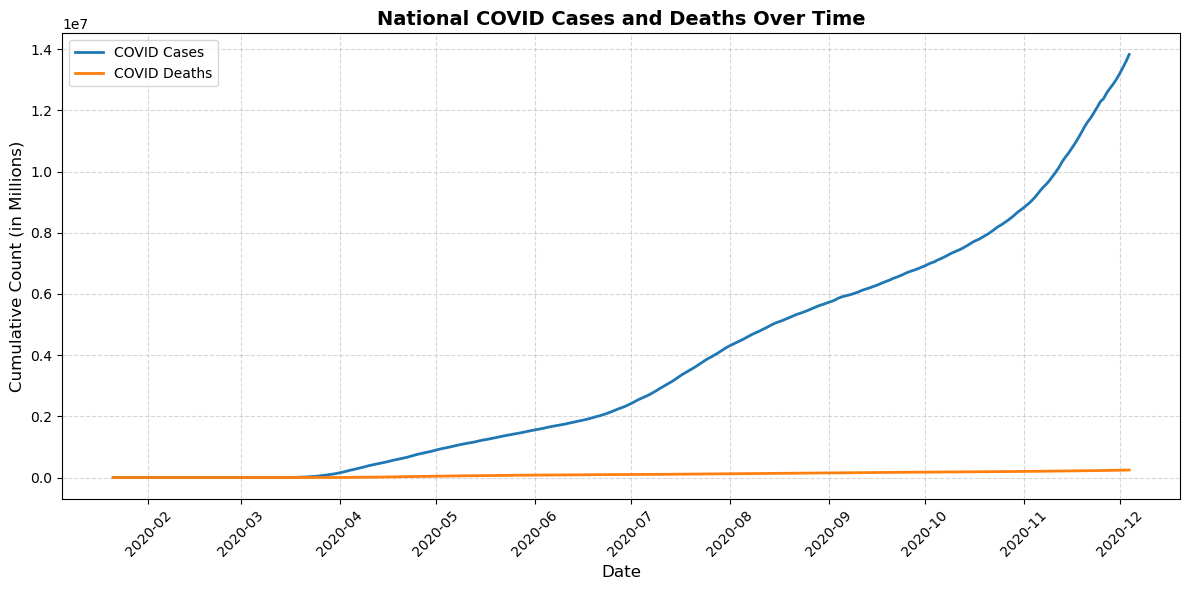

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.plot(
    national_df['Date'],
    national_df['COVID Cases'],
    label='COVID Cases',
    linewidth=2
)

plt.plot(
    national_df['Date'],
    national_df['Total Deaths (COVID)'],
    label='COVID Deaths',
    linewidth=2
)

plt.title("National COVID Cases and Deaths Over Time", fontsize=14, weight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Count (in Millions)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


### States with Unusually High COVID Death Rates

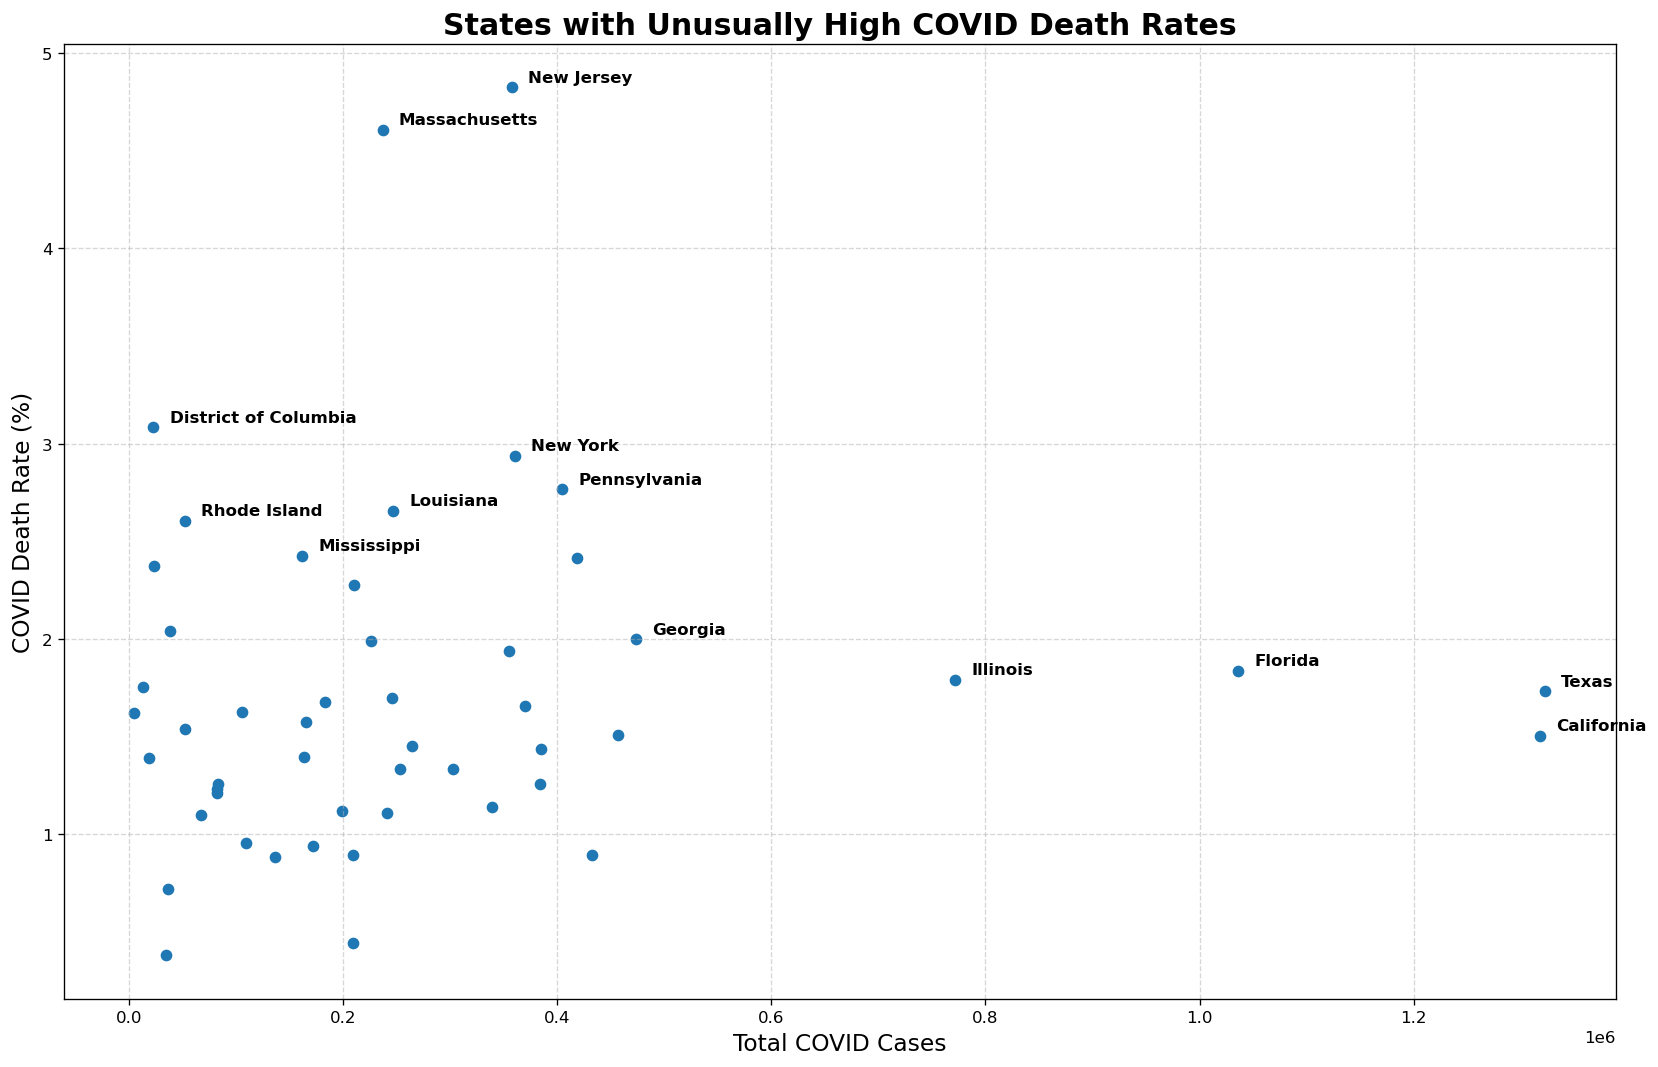

In [ ]:
x = state_df['COVID Cases']
y = state_df['COVID Death Rate']

# Finds outliers based on quantiles, which will help us label and identify outliers
high_death_threshold = y.quantile(0.85)     # 85th percentile for COVID Cases
high_cases_threshold = x.quantile(0.90)     # 90th percentile for COVID Death Rate

# Used to filter outlier states
mask = (y > high_death_threshold) | (x > high_cases_threshold)

plt.figure(figsize=(14, 9), dpi=120)

# Scatter all states
plt.scatter(x, y)

# Label only outliers
for null, row in state_df[mask].iterrows():
    plt.text(
        row['COVID Cases'] + 15000,
        row['COVID Death Rate'] + 0.03,
        row['State'],
        fontsize=10,
        weight="bold"
    )

plt.xlabel("Total COVID Cases", fontsize=14)
plt.ylabel("COVID Death Rate (%)", fontsize=14)
plt.title("States with Unusually High COVID Death Rates", fontsize=18, weight="bold")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### Relationship Between Cancer and COVID Mortality Across Counties

In [ ]:
# Drop rows with missing values in either column
mask = county_df['COVID Deaths per 100K'].notna() & county_df['Cancer Deaths per 100K'].notna()
tmp = county_df.loc[mask].copy()

x = tmp['Cancer Deaths per 100K']
y = tmp['COVID Deaths per 100K']

k = 15

idx_y = y.nlargest(k).index                    # top k by COVID deaths per 100k
idx_x = x.nlargest(k).index                    # top k by cancer deaths per 100k
outliers = tmp.loc[idx_y.union(idx_x)]         # union of both sets
outliers

,FIPS,County,State,Total Population,Male Population,Male Pct (%),Female Population,Female Pct (%),White Alone,White Pct (%),...,Hispanic or Latino,Hispanic/Latino Pct (%),Upper 95% CI for Death Rate,COVID Cases,Total Deaths (COVID),COVID Cases per 100K,COVID Deaths per 100K,COVID Death Rate,Cancer Deaths per 100K,Avg Deaths per Year (Cancer)
158,5111,Poinsett County,Arkansas,22740.0,11063.0,48.649956,11677.0,51.350044,19300.0,84.872471,...,840.0,3.693931,121,1754.0,44.0,7713.280563,193.491645,2.508552,145.118734,33.0
366,12125,Union County,Florida,15551.0,10023.0,64.452447,5528.0,35.547553,11388.0,73.230017,...,799.0,5.137933,141.4,1249.0,61.0,8031.637837,392.257733,4.883907,122.178638,19.0
440,13141,Hancock County,Georgia,8630.0,4566.0,52.908459,4064.0,47.091541,2280.0,26.419467,...,55.0,0.637312,62.4,536.0,47.0,6210.892236,544.611819,8.768657,57.937428,5.0
452,13165,Jenkins County,Georgia,8674.0,4621.0,53.274153,4053.0,46.725847,4975.0,57.355315,...,365.0,4.207978,85.8,502.0,34.0,5787.410653,391.976020,6.772908,69.172239,6.0
488,13239,Quitman County,Georgia,2092.0,1158.0,55.353728,934.0,44.646272,1012.0,48.374761,...,25.0,1.195029,146.9,85.0,1.0,4063.097514,47.801147,1.176471,191.204589,4.0
490,13243,Randolph County,Georgia,6270.0,2804.0,44.720893,3466.0,55.279107,1718.0,27.400319,...,223.0,3.556619,63,370.0,31.0,5901.116427,494.417863,8.378378,79.744817,5.0
880,20019,Chautauqua County,Kansas,3370.0,1794.0,53.234421,1576.0,46.765579,2806.0,83.264095,...,161.0,4.777448,123,102.0,1.0,3026.706231,29.673591,0.980392,148.367953,5.0
1041,21131,Leslie County,Kentucky,10261.0,5117.0,49.868434,5144.0,50.131566,9946.0,96.930124,...,51.0,0.497028,138.5,323.0,1.0,3147.841341,9.745639,0.309598,155.930221,16.0
1058,21165,Menifee County,Kentucky,6203.0,3243.0,52.281154,2960.0,47.718846,6025.0,97.130421,...,154.0,2.482670,144.4,137.0,1.0,2208.608738,16.121232,0.729927,145.091085,9.0
1070,21189,Owsley County,Kentucky,4021.0,2053.0,51.056951,1968.0,48.943049,3751.0,93.285252,...,0.0,0.000000,165.5,250.0,1.0,6217.358866,24.869435,0.400000,198.955484,8.0


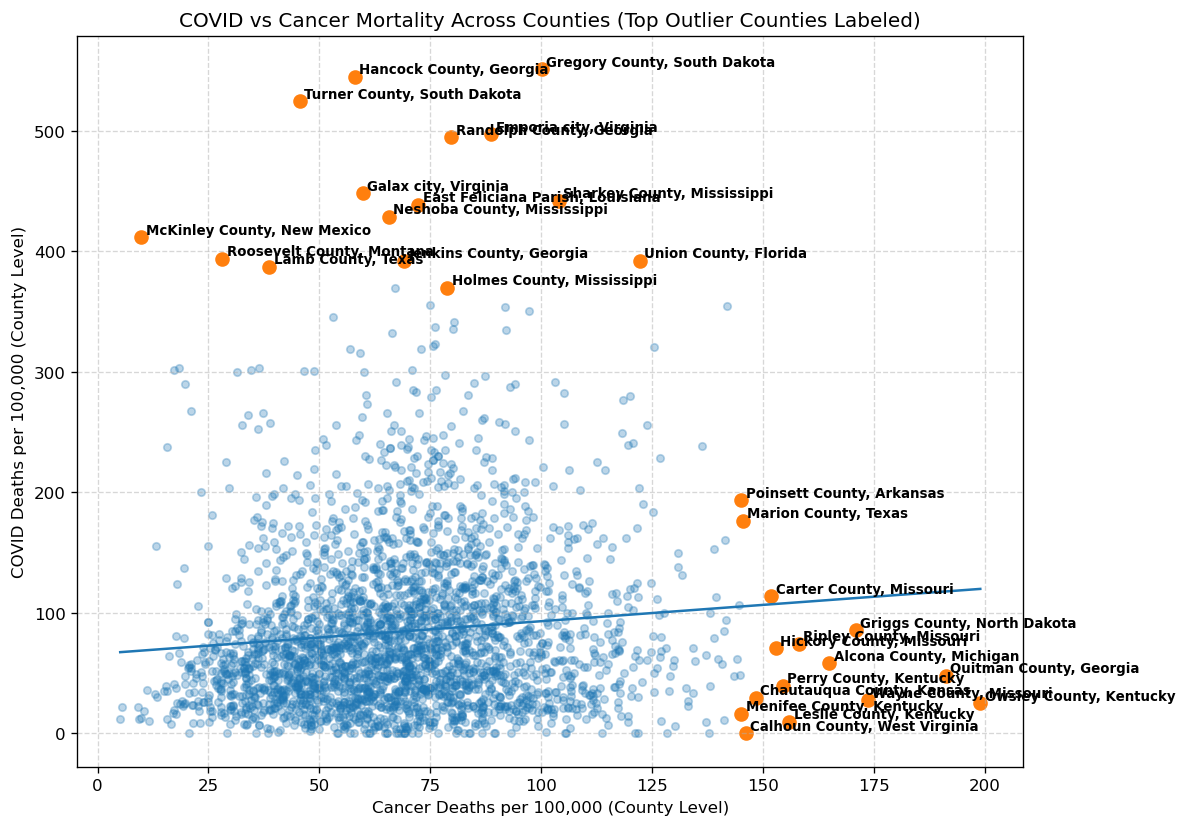

In [ ]:
plt.figure(figsize=(10, 7), dpi=120)

# All counties (background)
plt.scatter(x, y, alpha=0.3, s=20)

# Highlight outliers in a different color
plt.scatter(
    outliers['Cancer Deaths per 100K'],
    outliers['COVID Deaths per 100K'],
    s=60
)

# Label only outliers (County, State)
for _, row in outliers.iterrows():
    plt.text(
        row['Cancer Deaths per 100K'] + 1,      # small horizontal offset
        row['COVID Deaths per 100K'] + 3,       # small vertical offset
        f"{row['County']}, {row['State']}",
        fontsize=8,
        weight='bold'
    )

# Trendline for overall relationship
m, b = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max(), 200)
plt.plot(x_line, m * x_line + b)

plt.xlabel("Cancer Deaths per 100,000 (County Level)")
plt.ylabel("COVID Deaths per 100,000 (County Level)")
plt.title("COVID vs Cancer Mortality Across Counties (Top Outlier Counties Labeled)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## Analysis on Demographics and Health-Related Data

In [134]:
county_df.columns.tolist()

['FIPS',
 'County',
 'State',
 'Total Population',
 'Male Population',
 'Male Pct (%)',
 'Female Population',
 'Female Pct (%)',
 'White Alone',
 'White Pct (%)',
 'Black or African American Alone',
 'Black Pct (%)',
 'Hispanic or Latino',
 'Hispanic/Latino Pct (%)',
 'Upper 95% CI for Death Rate',
 'COVID Cases',
 'Total Deaths (COVID)',
 'COVID Cases per 100K',
 'COVID Deaths per 100K',
 'COVID Death Rate',
 'Cancer Deaths per 100K',
 'Avg Deaths per Year (Cancer)']

### COVID Mortality vs Percent Black Population (County Level)

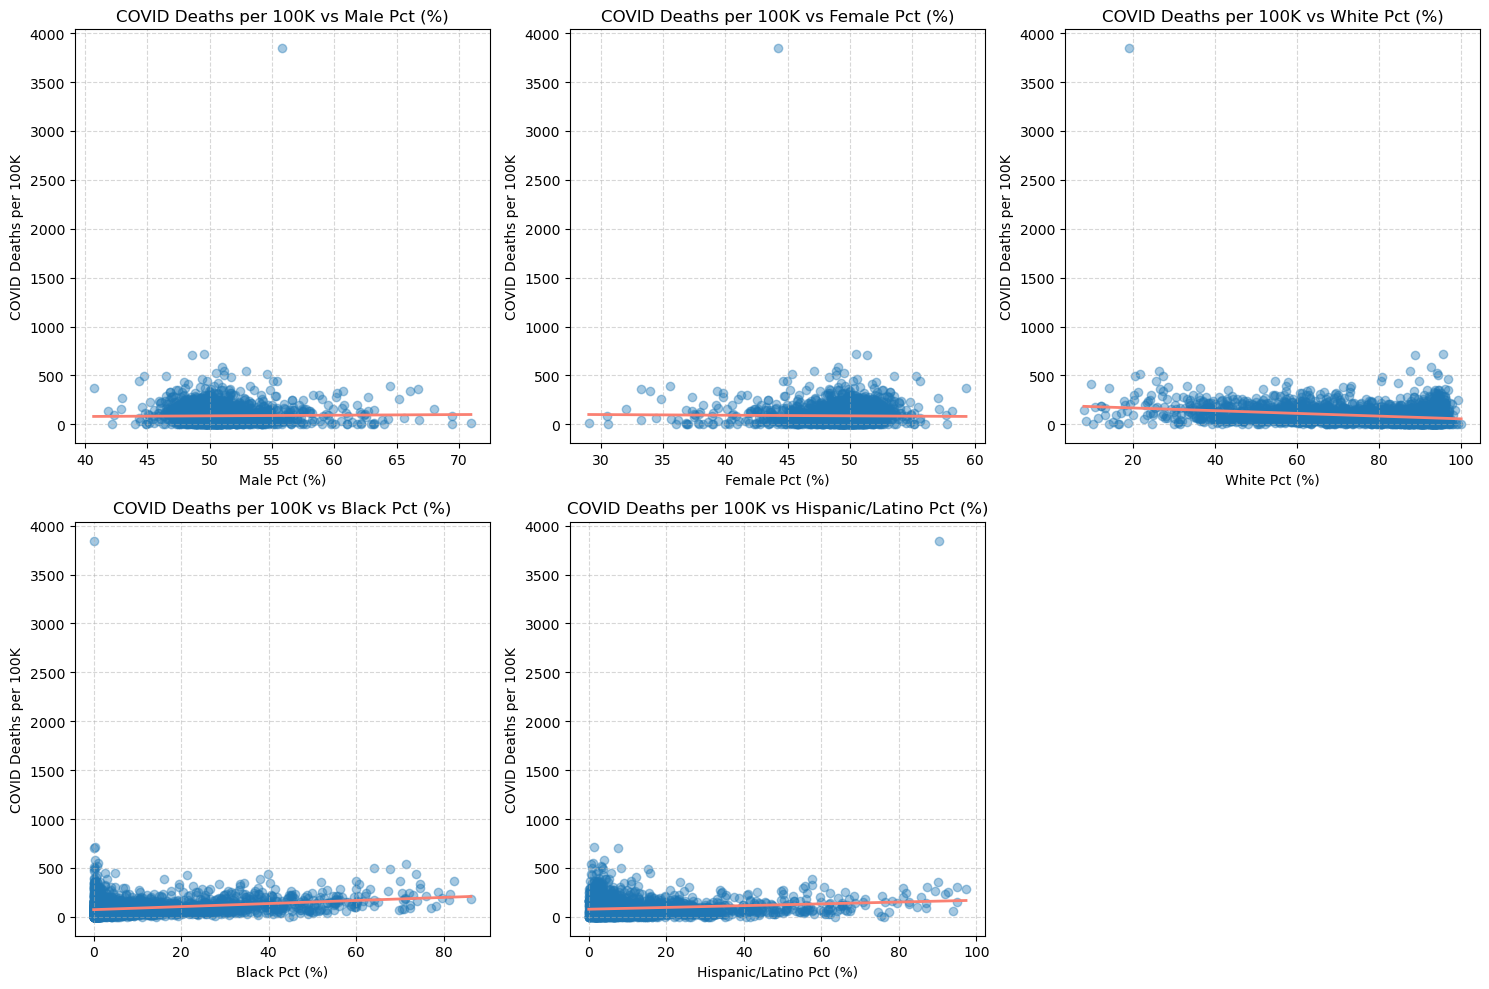

In [ ]:
demographic_columns = ['Male Pct (%)', 'Female Pct (%)', 'White Pct (%)', 'Black Pct (%)', 'Hispanic/Latino Pct (%)']
y = county_df['COVID Deaths per 100K']

plt.figure(figsize=(15, 10))

for i, col in enumerate(demographic_columns, 1):
    plt.subplot(2, 3, i)
    x = county_df[col]
    # Create scatterplot
    plt.scatter(x, y, alpha=0.4)
    # Regression line
    m, b = np.polyfit(x.dropna(), y.loc[x.dropna().index], 1)
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = m * x_line + b
    
    plt.plot(x_line, y_line, color='salmon', linewidth=2)
    plt.title(f"COVID Deaths per 100K vs {col}")
    plt.xlabel(col)
    plt.ylabel("COVID Deaths per 100K")
    plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

Notes:
- Distribution of demographics for counties across the country can easily be visualized here. Counties with higher white population is more common, which was expected
- Both COVID Deaths per 100K vs Black Pct AND Hispanic Pct has a right skewed tail, with lower population percentages for both demographics experiencing more frequent and higher COVID deaths per 100K

### Finding $r$ for each chart might be beneficial. **Go back to this later**

## COVID Deaths per 100K by State

In [136]:
state_df

,State,Avg Deaths per Year (Cancer),COVID Cases,COVID Deaths per 100K,Total Deaths (COVID),COVID Cases per 100K,COVID Death Rate,Total Population,Male Population,Male Pct (%),Female Population,Female Pct (%),White Alone,White Pct (%),Black or African American Alone,Black Pct (%),Hispanic or Latino,Hispanic/Latino Pct (%)
0,Alabama,3186.0,264199.0,75.876692,3835.0,5227.261081,1.451557,5054253.0,2453419.0,48.541674,2600834.0,51.458326,3303370.0,65.358224,1318507.0,26.087080,271640.0,5.374484
1,Alaska,234.0,34043.0,18.408926,129.0,4858.101426,0.378933,700747.0,367699.0,52.472433,333048.0,47.527567,430796.0,61.476681,22452.0,3.204009,50912.0,7.265390
2,Arizona,2740.0,355054.0,94.728044,6885.0,4885.050236,1.939142,7268175.0,3628694.0,49.925793,3639481.0,50.074207,4593653.0,63.202289,336931.0,4.635703,2255770.0,31.036264
3,Arkansas,2141.0,164562.0,85.502750,2593.0,5426.341508,1.575698,3032651.0,1495958.0,49.328393,1536693.0,50.671607,2148886.0,70.858335,452127.0,14.908639,265833.0,8.765697
4,California,12750.0,1318162.0,50.434749,19792.0,3358.991978,1.501485,39242785.0,19605882.0,49.960476,19636903.0,50.039524,17248779.0,43.954013,2173343.0,5.538198,15630830.0,39.831093
5,Colorado,1563.0,252961.0,58.098973,3376.0,4353.309903,1.334593,5810774.0,2942568.0,50.639863,2868206.0,49.360137,4268784.0,73.463260,232985.0,4.009535,1291078.0,22.218692
6,Delaware,565.0,38303.0,77.743490,782.0,3807.939778,2.041616,1005872.0,487585.0,48.473861,518287.0,51.526139,621799.0,61.816911,220645.0,21.935694,107829.0,10.719952
7,District of Columbia,240.0,22480.0,103.112878,693.0,3344.844877,3.082740,672079.0,320001.0,47.613599,352078.0,52.386401,262549.0,39.065199,290772.0,43.264557,77760.0,11.570068
8,Florida,11928.0,1036294.0,86.634608,18998.0,4725.703970,1.833264,21928881.0,10773620.0,49.129821,11155261.0,50.870179,13136701.0,59.905934,3363769.0,15.339447,5865737.0,26.748912
9,Georgia,4506.0,473344.0,87.326601,9451.0,4373.666562,1.996645,10822590.0,5281762.0,48.803124,5540828.0,51.196876,5677531.0,52.460003,3391689.0,31.338977,1158299.0,10.702604


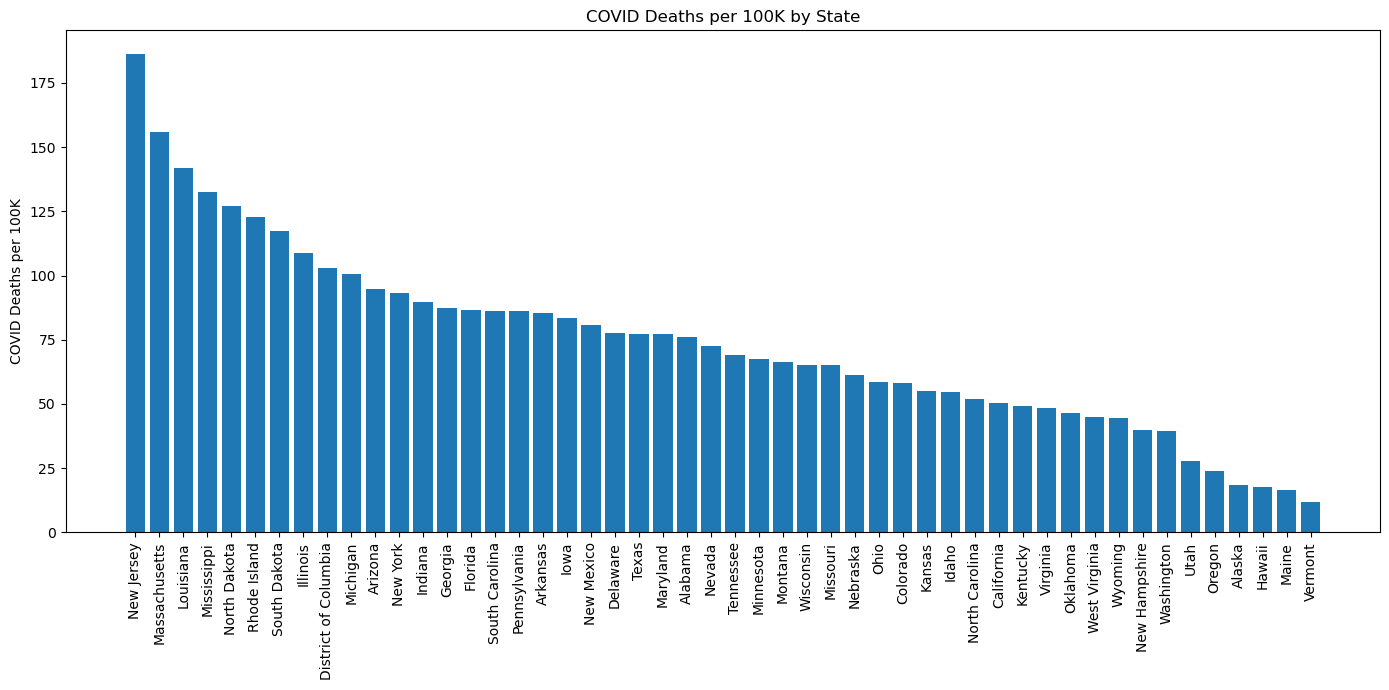

In [ ]:
state_df_sorted = state_df.sort_values('COVID Deaths per 100K', ascending=False)

plt.figure(figsize=(14,7))
plt.bar(state_df_sorted['State'], state_df_sorted['COVID Deaths per 100K'])
plt.xticks(rotation=90)
plt.ylabel("COVID Deaths per 100K")
plt.title("COVID Deaths per 100K by State")
plt.tight_layout()
plt.show()

### matplotlib.colors 
https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py

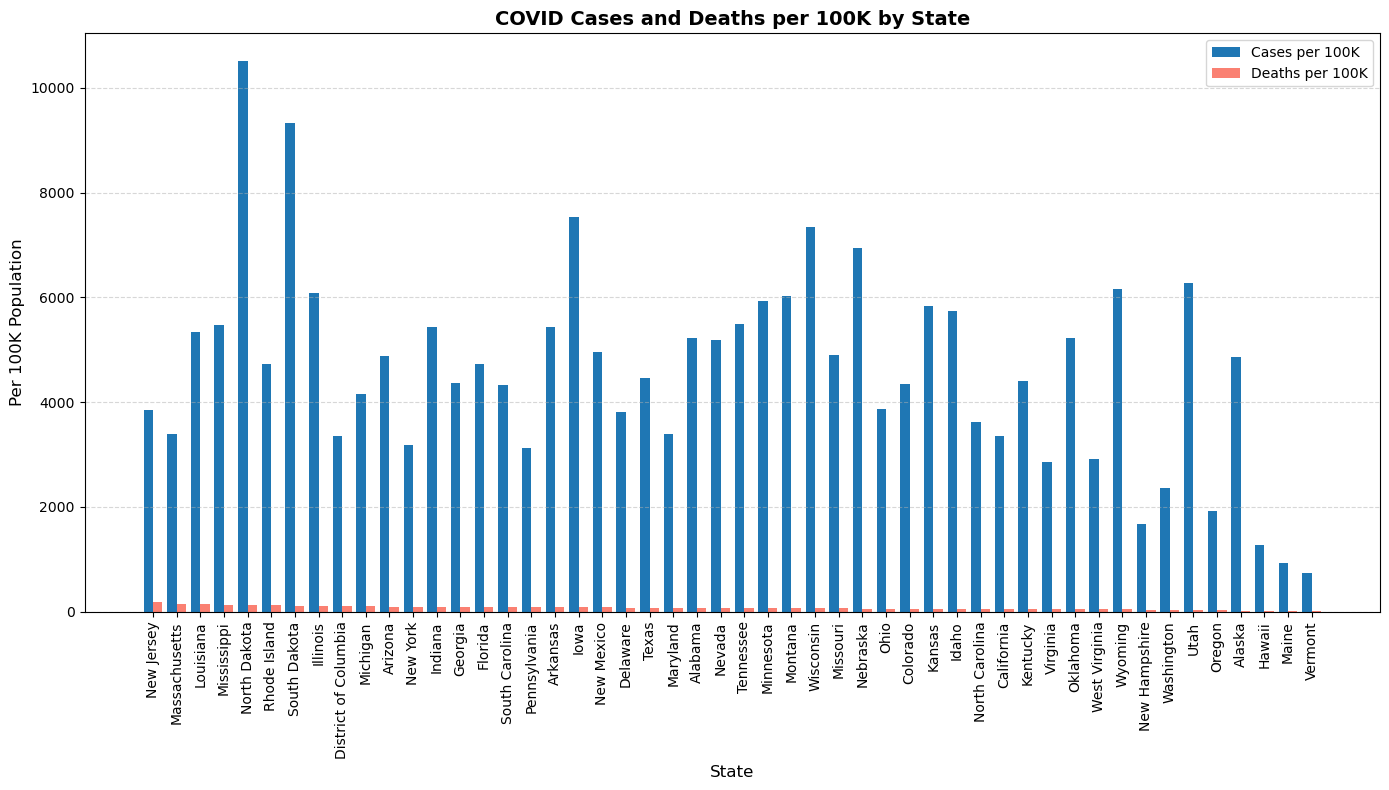

In [ ]:
state_df_sorted = state_df.sort_values('COVID Deaths per 100K', ascending=False)

states = state_df_sorted['State']
y0 = state_df_sorted['COVID Cases per 100K']
y1 = state_df_sorted['COVID Deaths per 100K']

x = np.arange(len(states))
width = 0.4

plt.figure(figsize=(14, 8))

plt.bar(x - width/2, y0, width, label='Cases per 100K')
plt.bar(x + width/2, y1, width, label='Deaths per 100K', color='salmon')

# Formatting the chart
plt.title("COVID Cases and Deaths per 100K by State", fontsize=14, weight='bold')
plt.xlabel("State", fontsize=12)
plt.ylabel("Per 100K Population", fontsize=12)
plt.xticks(x, states, rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Same state-index order. Higher death rate does not mean higher COVID cases, and vice versa. In the next section, we attempted to calculate quantitative statistics and visualizations to quickly allow us to see what other factors have relationships.

### Correlation Heatmap

The next cell generates a correlation heatmap to summarize how key variables in our dataset relate to one another on a county level. This table helps us visualize the matrix as a heatmap (thanks to colorformat *heatmap*) to quickly identify any significant patterns and connections across demographic and health related metrics.

The heatmap includes standardized metrics, allowing us to compare counties on the same scale and observe broader trends. `Darker colors represent stronger correlations, while lighter colors indicate weaker or no relationship. Blue (-1) represents a strong negative relationship and Red (1) represents a strong positive relationship`

How the table was built:
```python
standardized_columns = [<columns>]      # All columns with standard metrics
corr = df[standardized_columns].corr    # Creates a matrix of values containing floats ranging froom -1 to 1
```
### Correlation Matrix

The correlation matrix was computed with:

```python
# 2D Array/Matrix of Correlation Values
corr_values = corr.values.round(2)      # Corr is a Dataframe listing correlations with standardardized variables
corr_values
```
This gives the following output:
```python
"""
[[ 1.    0.45  0.1   0.02 -0.02 -0.24  0.22  0.13]
 [ 0.45  1.   -0.04  0.21 -0.21 -0.11  0.04  0.08]
 [ 0.1  -0.04  1.   -0.01  0.01  0.28  0.01 -0.41]
 [ 0.02  0.21 -0.01  1.   -1.    0.05 -0.15  0.13]
 [-0.02 -0.21  0.01 -1.    1.   -0.05  0.15 -0.13]
 [-0.24 -0.11  0.28  0.05 -0.05  1.   -0.71 -0.41]
 [ 0.22  0.04  0.01 -0.15  0.15 -0.71  1.   -0.11]
 [ 0.13  0.08 -0.41  0.13 -0.13 -0.41 -0.11  1.  ]]
"""
```
This is the numerical representation of the heatmap. The chart will be created using plt.imshow() with dataframe 'corr' as input.
```python
plt.imshow(corr, cmap=<colorformat>, interpolation=<str>)

# Labels each tick for both x and y-axis with column names
plt.xticks((<x0>, <xn>), df.columns)
plt.yticks((<y0>, <yn>), df.columns)
plt.colorbar(label=<str>)
```
### https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

[[ 1.    0.45  0.1   0.02 -0.02 -0.24  0.22  0.13]
 [ 0.45  1.   -0.04  0.21 -0.21 -0.11  0.04  0.08]
 [ 0.1  -0.04  1.   -0.01  0.01  0.28  0.01 -0.41]
 [ 0.02  0.21 -0.01  1.   -1.    0.05 -0.15  0.13]
 [-0.02 -0.21  0.01 -1.    1.   -0.05  0.15 -0.13]
 [-0.24 -0.11  0.28  0.05 -0.05  1.   -0.71 -0.41]
 [ 0.22  0.04  0.01 -0.15  0.15 -0.71  1.   -0.11]
 [ 0.13  0.08 -0.41  0.13 -0.13 -0.41 -0.11  1.  ]]


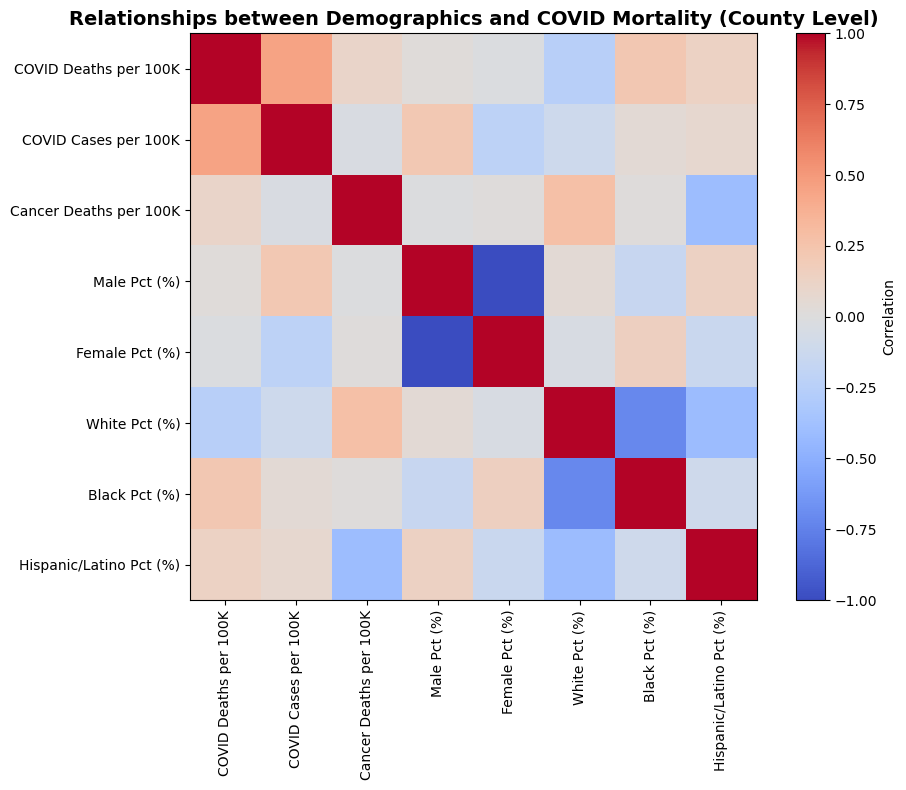

In [ ]:
import matplotlib.pyplot as plt
# List of column names used to find correlations
standardized_columns = ['COVID Deaths per 100K', 'COVID Cases per 100K', 'Cancer Deaths per 100K', 'Male Pct (%)','Female Pct (%)', 'White Pct (%)', 'Black Pct (%)', 'Hispanic/Latino Pct (%)']
# Calculate the correlation matrix
corr = county_df[standardized_columns].corr()

# Correlation matrix rounded to 2 decimal places for better readability
corr_values = corr.values.round(2)
print(corr_values)

# Heatmap plot formatting
plt.figure(figsize=(10,8))
# 'coolwarm' colormap was chosen for better visual distinction between positive and negative correlations
plt.imshow(corr, cmap='coolwarm')

plt.xticks(range(len(corr)), corr.columns, rotation=90)     # Made text vertical to avoid overlaps
plt.yticks(range(len(corr)), corr.columns)

plt.colorbar(label='Correlation')
plt.title("Relationships between Demographics and COVID Mortality (County Level)", size=14, weight='bold')
plt.tight_layout()
plt.show()


Notes:
- Counties with higher white population has less COVID cases and deaths.
- Higher COVID cases leads to higher deaths as expected
- Higher black population percentages -> higher COVID death rates, r is probably ~0.4 to 0.5. Clearly indicates a positive correlation
- Higher Hispanic population percentages -> higher COVID death rates. The shade is lighter red here, indicating smaller correlation r.
- Higher male population -> higher COVID cases per 100K, and there is no correlation for COVID death rates and gender.
- Hispanic population has less deaths caused by cancer

### COVID-19 Cases and Deaths Overtime

In [140]:
covid_counties_df

,Date,County,State,FIPS,Cases,Deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
800432,2020-12-05,Sweetwater,Wyoming,56037.0,2098,10.0
800433,2020-12-05,Teton,Wyoming,56039.0,1739,2.0
800434,2020-12-05,Uinta,Wyoming,56041.0,1187,5.0
800435,2020-12-05,Washakie,Wyoming,56043.0,519,8.0


In [ ]:
# Group by date across all states and sum cases & deaths
us_df = (covid_counties_df.groupby('Date')[['Cases', 'Deaths']].sum()).reset_index()

us_df.head()

,Date,Cases,Deaths
0,2020-01-21,1,0.0
1,2020-01-22,1,0.0
2,2020-01-23,1,0.0
3,2020-01-24,2,0.0
4,2020-01-25,3,0.0


In [ ]:
filtered_df['COVID Deaths per 100K'] = ((filtered_df['Total Deaths (COVID)'] / filtered_df['Total Population']) * 100000).round(2)
filtered_df['COVID Cases per 100K'] = ((filtered_df['COVID Cases'] / filtered_df['Total Population']) * 100000).round(2)
filtered_df['Cancer Deaths per 100K'] = ((filtered_df['Avg Deaths per Year (Cancer)'] / filtered_df['Total Population']) * 100000).round(2)
filtered_df

/var/folders/fc/_2l681p52m98dmwfmr_30w2h0000gn/T/ipykernel_22534/2886658602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['COVID Deaths per 100K'] = ((filtered_df['Total Deaths (COVID)'] / filtered_df['Total Population']) * 100000).round(2)
/var/folders/fc/_2l681p52m98dmwfmr_30w2h0000gn/T/ipykernel_22534/2886658602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['COVID Cases per 100K'] = ((filtered_df['COVID Cases'] / filtered_df['Total Population']) * 100000).round(2)
/var

,FIPS,Upper 95% CI for Death Rate,Avg Deaths per Year (Cancer),Date,COVID Cases,Total Deaths (COVID),County,State,Total Population,Male Population,Female Population,White Alone,Black or African American Alone,Hispanic or Latino,COVID Deaths per 100K,COVID Cases per 100K,Cancer Deaths per 100K
206767,1001,69.2,34.0,2020-03-24,1.0,0.0,Autauga County,Alabama,59285.0,28669.0,30616.0,43616.0,11829.0,2188.0,0.00,1.69,57.35
206768,1001,69.2,34.0,2020-03-25,4.0,0.0,Autauga County,Alabama,59285.0,28669.0,30616.0,43616.0,11829.0,2188.0,0.00,6.75,57.35
206769,1001,69.2,34.0,2020-03-26,6.0,0.0,Autauga County,Alabama,59285.0,28669.0,30616.0,43616.0,11829.0,2188.0,0.00,10.12,57.35
206770,1001,69.2,34.0,2020-03-27,6.0,0.0,Autauga County,Alabama,59285.0,28669.0,30616.0,43616.0,11829.0,2188.0,0.00,10.12,57.35
206771,1001,69.2,34.0,2020-03-28,6.0,0.0,Autauga County,Alabama,59285.0,28669.0,30616.0,43616.0,11829.0,2188.0,0.00,10.12,57.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535523,56045,68.6,4.0,2020-11-30,397.0,1.0,Weston County,Wyoming,6835.0,3729.0,3106.0,5865.0,4.0,238.0,14.63,5808.34,58.52
535524,56045,68.6,4.0,2020-12-01,409.0,2.0,Weston County,Wyoming,6835.0,3729.0,3106.0,5865.0,4.0,238.0,29.26,5983.91,58.52
535525,56045,68.6,4.0,2020-12-02,415.0,2.0,Weston County,Wyoming,6835.0,3729.0,3106.0,5865.0,4.0,238.0,29.26,6071.69,58.52
535526,56045,68.6,4.0,2020-12-03,419.0,2.0,Weston County,Wyoming,6835.0,3729.0,3106.0,5865.0,4.0,238.0,29.26,6130.21,58.52


## Pivoting
---
### Deeper analysis into the relationship between COVID and Cancer

We use a pivot table based on the county-level dataset `county_df`, where its counties are grouped into 4 cancer morality quartiles. This step was used as an attempt to find if any underlying health conditions affected COVID outcomes.

Cancer Risk Quartiles & COVID Mortality Comparison
Quartiles are created using qcut(), which divides counties into evenly sized groups based on their Cancer Deaths per 100K:
```
  Q1 = Lowest cancer mortality counties
  Q4 = Highest cancer mortality counties
```
After categorizing counties, we create a pivot table summarizing COVID Cases and COVID Deaths per 100K for each quartile and visualize it with a bar chart. This relationship helps us assess whether counties with poorer underlying health conditions suffer more severe COVID outcomes.

In [143]:
# Create county-level cancer mortality quartiles
risk_column = "Cancer Risk Quartile"
quartiles = ["Q1 (Lowest cancer mortality)", "Q2", "Q3", "Q4 (Highest cancer mortality)"]

county_df[risk_column] = pd.qcut(county_df["Cancer Deaths per 100K"], q=4, labels=quartiles)
county_df[["County", "State", "Cancer Deaths per 100K", risk_column]].head()

/var/folders/fc/_2l681p52m98dmwfmr_30w2h0000gn/T/ipykernel_22534/2546740490.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df[risk_column] = pd.qcut(county_df["Cancer Deaths per 100K"], q=4, labels=quartiles)


,County,State,Cancer Deaths per 100K,Cancer Risk Quartile
0,Autauga County,Alabama,57.350089,Q2
1,Baldwin County,Alabama,50.428223,Q2
2,Barbour County,Alabama,80.785232,Q3
3,Bibb County,Alabama,76.742506,Q3
4,Blount County,Alabama,72.522431,Q3


In [ ]:
county_df

,FIPS,County,State,Total Population,Male Population,Male Pct (%),Female Population,Female Pct (%),White Alone,White Pct (%),...,Hispanic/Latino Pct (%),Upper 95% CI for Death Rate,COVID Cases,Total Deaths (COVID),COVID Cases per 100K,COVID Deaths per 100K,COVID Death Rate,Cancer Deaths per 100K,Avg Deaths per Year (Cancer),Cancer Risk Quartile
0,1001,Autauga County,Alabama,59285.0,28669.0,48.357932,30616.0,51.642068,43616.0,73.570043,...,3.690647,69.2,2945.0,42.0,4967.529729,70.844227,1.426146,57.350089,34.0,Q2
1,1003,Baldwin County,Alabama,239945.0,117316.0,48.892871,122629.0,51.107129,198721.0,82.819396,...,5.581696,52,9501.0,138.0,3959.657421,57.513180,1.452479,50.428223,121.0,Q2
2,1005,Barbour County,Alabama,24757.0,12906.0,52.130711,11851.0,47.869289,10891.0,43.991598,...,6.018500,75,1217.0,29.0,4915.781395,117.138587,2.382909,80.785232,20.0,Q3
3,1007,Bibb County,Alabama,22152.0,11824.0,53.376670,10328.0,46.623330,16634.0,75.090285,...,3.358613,84.1,1270.0,38.0,5733.116649,171.542073,2.992126,76.742506,17.0,Q3
4,1009,Blount County,Alabama,59292.0,29934.0,50.485732,29358.0,49.514268,53062.0,89.492680,...,10.055319,68.6,3231.0,46.0,5449.301761,77.582136,1.423708,72.522431,43.0,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113,56037,Sweetwater County,Wyoming,41786.0,21396.0,51.203752,20390.0,48.796248,34434.0,82.405590,...,16.570143,38.1,2077.0,10.0,4970.564304,23.931460,0.481464,21.538314,9.0,Q1 (Lowest cancer mortality)
3114,56039,Teton County,Wyoming,23358.0,12298.0,52.650056,11060.0,47.349944,18793.0,80.456375,...,14.748694,43.9,1724.0,2.0,7380.768901,8.562377,0.116009,21.405942,5.0,Q1 (Lowest cancer mortality)
3115,56041,Uinta County,Wyoming,20605.0,10399.0,50.468333,10206.0,49.531667,18743.0,90.963358,...,9.910216,35,1175.0,5.0,5702.499393,24.265955,0.425532,19.412764,4.0,Q1 (Lowest cancer mortality)
3116,56043,Washakie County,Wyoming,7708.0,3871.0,50.220550,3837.0,49.779450,6364.0,82.563570,...,14.102231,58.3,517.0,8.0,6707.317073,103.788272,1.547389,64.867670,5.0,Q2


Create a categorical variable that groups counties by cancer mortalityinto quartiles (Q1 = lowest cancer mortality, Q4 = highest).

In [ ]:
county_df['Cancer Risk Quartile'] = pd.qcut(county_df['Cancer Deaths per 100K'], q=4, labels=quartiles)

county_df

/var/folders/fc/_2l681p52m98dmwfmr_30w2h0000gn/T/ipykernel_22534/2970280482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['Cancer Risk Quartile'] = pd.qcut(county_df['Cancer Deaths per 100K'], q=4, labels=quartiles)


,FIPS,County,State,Total Population,Male Population,Male Pct (%),Female Population,Female Pct (%),White Alone,White Pct (%),...,Hispanic/Latino Pct (%),Upper 95% CI for Death Rate,COVID Cases,Total Deaths (COVID),COVID Cases per 100K,COVID Deaths per 100K,COVID Death Rate,Cancer Deaths per 100K,Avg Deaths per Year (Cancer),Cancer Risk Quartile
0,1001,Autauga County,Alabama,59285.0,28669.0,48.357932,30616.0,51.642068,43616.0,73.570043,...,3.690647,69.2,2945.0,42.0,4967.529729,70.844227,1.426146,57.350089,34.0,Q2
1,1003,Baldwin County,Alabama,239945.0,117316.0,48.892871,122629.0,51.107129,198721.0,82.819396,...,5.581696,52,9501.0,138.0,3959.657421,57.513180,1.452479,50.428223,121.0,Q2
2,1005,Barbour County,Alabama,24757.0,12906.0,52.130711,11851.0,47.869289,10891.0,43.991598,...,6.018500,75,1217.0,29.0,4915.781395,117.138587,2.382909,80.785232,20.0,Q3
3,1007,Bibb County,Alabama,22152.0,11824.0,53.376670,10328.0,46.623330,16634.0,75.090285,...,3.358613,84.1,1270.0,38.0,5733.116649,171.542073,2.992126,76.742506,17.0,Q3
4,1009,Blount County,Alabama,59292.0,29934.0,50.485732,29358.0,49.514268,53062.0,89.492680,...,10.055319,68.6,3231.0,46.0,5449.301761,77.582136,1.423708,72.522431,43.0,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113,56037,Sweetwater County,Wyoming,41786.0,21396.0,51.203752,20390.0,48.796248,34434.0,82.405590,...,16.570143,38.1,2077.0,10.0,4970.564304,23.931460,0.481464,21.538314,9.0,Q1 (Lowest cancer mortality)
3114,56039,Teton County,Wyoming,23358.0,12298.0,52.650056,11060.0,47.349944,18793.0,80.456375,...,14.748694,43.9,1724.0,2.0,7380.768901,8.562377,0.116009,21.405942,5.0,Q1 (Lowest cancer mortality)
3115,56041,Uinta County,Wyoming,20605.0,10399.0,50.468333,10206.0,49.531667,18743.0,90.963358,...,9.910216,35,1175.0,5.0,5702.499393,24.265955,0.425532,19.412764,4.0,Q1 (Lowest cancer mortality)
3116,56043,Washakie County,Wyoming,7708.0,3871.0,50.220550,3837.0,49.779450,6364.0,82.563570,...,14.102231,58.3,517.0,8.0,6707.317073,103.788272,1.547389,64.867670,5.0,Q2


In [146]:
# Columns we want to summarize by cancer risk group
values = ['COVID Cases per 100K', 'COVID Deaths per 100K']

# Compute mean and median COVID outcomes for each cancer risk quartile
county_pivot = pd.pivot_table(county_df, index=risk_column, values=values, aggfunc=['mean', 'median']).round(2)
county_pivot

/var/folders/fc/_2l681p52m98dmwfmr_30w2h0000gn/T/ipykernel_22534/3091359021.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  county_pivot = pd.pivot_table(county_df, index=risk_column, values=values, aggfunc=['mean', 'median']).round(2)
/var/folders/fc/_2l681p52m98dmwfmr_30w2h0000gn/T/ipykernel_22534/3091359021.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  county_pivot = pd.pivot_table(county_df, index=risk_column, values=values, aggfunc=['mean', 'median']).round(2)


mean                        \
                              COVID Cases per 100K COVID Deaths per 100K   
Cancer Risk Quartile                                                       
Q1 (Lowest cancer mortality)               4941.92                 69.91   
Q2                                         4958.24                 83.89   
Q3                                         4849.45                 94.13   
Q4 (Highest cancer mortality)              4745.74                 90.48   

                                            median                        
                              COVID Cases per 100K COVID Deaths per 100K  
Cancer Risk Quartile                                                      
Q1 (Lowest cancer mortality)               4549.85                 54.60  
Q2                                         4801.10                 70.66  
Q3                                         4757.42                 79.00  
Q4 (Highest cancer mortality)              4575.04                 75.22

### Visualizing the Pivot Table

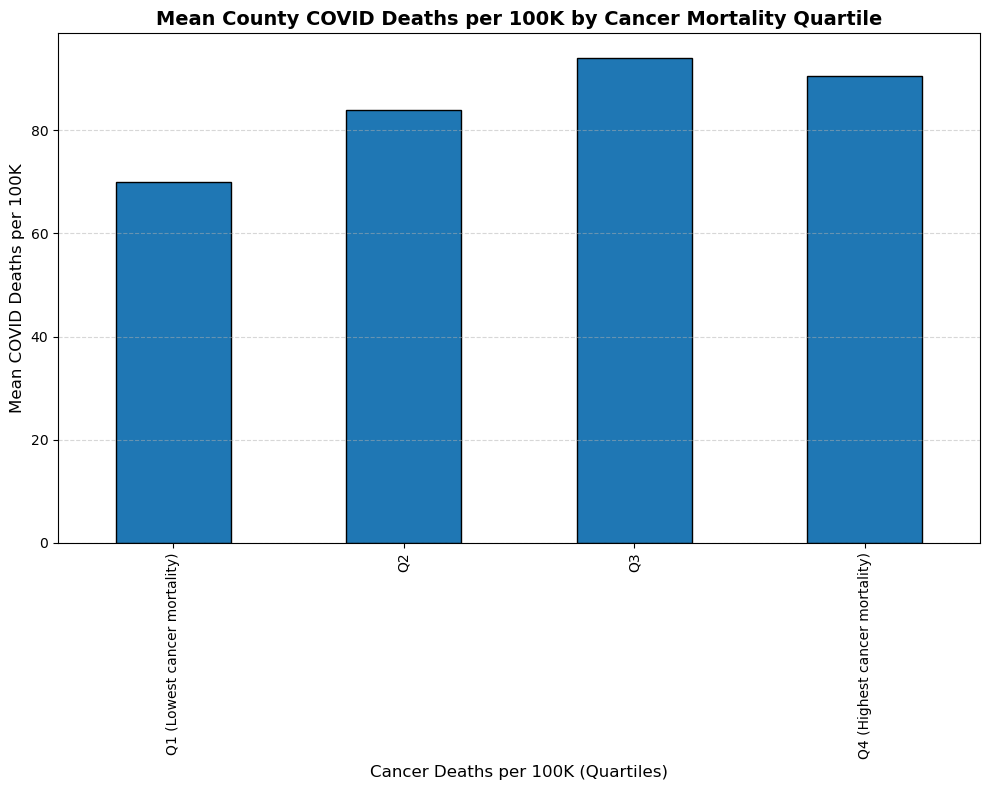

In [ ]:
# Extract mean COVID deaths per 100K by cancer risk quartile
mean_deaths_by_risk = county_pivot['mean']['COVID Deaths per 100K']

# Ensure the index is in the intended quartile order
mean_deaths_by_risk = mean_deaths_by_risk.sort_index()
# Plotting bar chart by quartiles
mean_deaths_by_risk.plot(kind='bar', figsize=(10, 8),edgecolor='black')

plt.title("Mean County COVID Deaths per 100K by Cancer Mortality Quartile", fontsize=14, weight='bold')
plt.xlabel("Cancer Deaths per 100K (Quartiles)", fontsize=12)
plt.ylabel("Mean COVID Deaths per 100K", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Notes:
- Q4 is slightly taller than Q1, indicating a positive relationship between cancer mortality and COVID deaths
- Find $R^2$ to see if demographics had anything to do with this trend

### Grouped Bar Chart
https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

**Let's see what this looks like when we compare it to max COVID Deaths side by side**

In [148]:
county_pivot

mean                        \
                              COVID Cases per 100K COVID Deaths per 100K   
Cancer Risk Quartile                                                       
Q1 (Lowest cancer mortality)               4941.92                 69.91   
Q2                                         4958.24                 83.89   
Q3                                         4849.45                 94.13   
Q4 (Highest cancer mortality)              4745.74                 90.48   

                                            median                        
                              COVID Cases per 100K COVID Deaths per 100K  
Cancer Risk Quartile                                                      
Q1 (Lowest cancer mortality)               4549.85                 54.60  
Q2                                         4801.10                 70.66  
Q3                                         4757.42                 79.00  
Q4 (Highest cancer mortality)              4575.04                 75.22

In [149]:
county_pivot_2 = (county_df.groupby('Cancer Risk Quartile')['COVID Deaths per 100K'].agg(median='median', max='max'))

county_pivot_2.head()

/var/folders/fc/_2l681p52m98dmwfmr_30w2h0000gn/T/ipykernel_22534/4170221853.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  county_pivot_2 = (county_df.groupby('Cancer Risk Quartile')['COVID Deaths per 100K'].agg(median='median', max='max'))


,median,max
Cancer Risk Quartile,,
Q1 (Lowest cancer mortality),54.598126,524.395805
Q2,70.660677,544.611819
Q3,79.004401,494.417863
Q4 (Highest cancer mortality),75.222533,550.964187


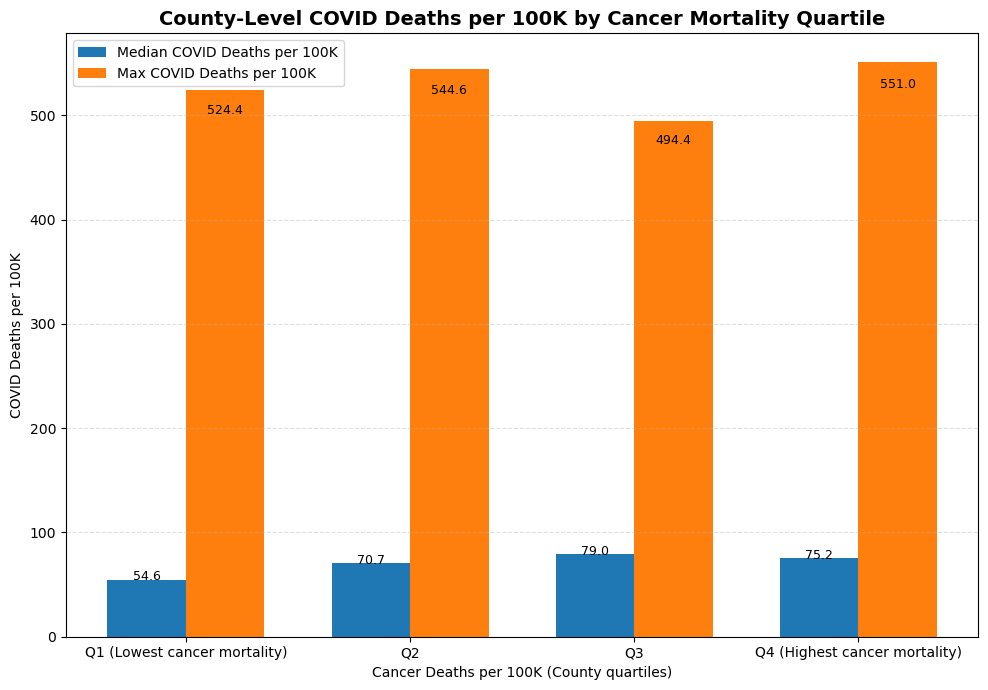

In [ ]:
quartiles = county_pivot_2.index
x = np.arange(len(quartiles))
width = 0.35

median_vals = county_pivot_2["median"]
max_vals = county_pivot_2["max"]

plt.figure(figsize=(10, 7))

median_bars = plt.bar(x - width/2, median_vals, width, label="Median COVID Deaths per 100K")
max_bars = plt.bar(x + width/2, max_vals, width, label="Max COVID Deaths per 100K")

plt.title("County-Level COVID Deaths per 100K by Cancer Mortality Quartile", fontsize=14, weight="bold")
plt.ylabel("COVID Deaths per 100K")
plt.xlabel("Cancer Deaths per 100K (County quartiles)")
plt.xticks(x, quartiles)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.4)

# Helper function to place text above bars
def add_bar_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height - (height * 0.05),   # Slightly below orange bar (max per 100K)
            f"{height:.1f}",
            ha='center',
            va='bottom',
            fontsize=9
        )

# Add labels to both bar groups
add_bar_labels(median_bars)
add_bar_labels(max_bars)

plt.tight_layout()
plt.show()

Chart displays a significant gap between the median and maximum COVID death rates within each cancer mortality quartile. The extreme maximum values show that certain high-cancer-mortality counties experience disproportionately high COVID death rates. Q4 (highest cancer morality) also experience the highest max COVID deaths, but also has the lowest median COVID deaths out of the other 3 quartiles.

In [ ]:
county_df

,FIPS,County,State,Total Population,Male Population,Male Pct (%),Female Population,Female Pct (%),White Alone,White Pct (%),...,Hispanic/Latino Pct (%),Upper 95% CI for Death Rate,COVID Cases,Total Deaths (COVID),COVID Cases per 100K,COVID Deaths per 100K,COVID Death Rate,Cancer Deaths per 100K,Avg Deaths per Year (Cancer),Cancer Risk Quartile
0,1001,Autauga County,Alabama,59285.0,28669.0,48.357932,30616.0,51.642068,43616.0,73.570043,...,3.690647,69.2,2945.0,42.0,4967.529729,70.844227,1.426146,57.350089,34.0,Q2
1,1003,Baldwin County,Alabama,239945.0,117316.0,48.892871,122629.0,51.107129,198721.0,82.819396,...,5.581696,52,9501.0,138.0,3959.657421,57.513180,1.452479,50.428223,121.0,Q2
2,1005,Barbour County,Alabama,24757.0,12906.0,52.130711,11851.0,47.869289,10891.0,43.991598,...,6.018500,75,1217.0,29.0,4915.781395,117.138587,2.382909,80.785232,20.0,Q3
3,1007,Bibb County,Alabama,22152.0,11824.0,53.376670,10328.0,46.623330,16634.0,75.090285,...,3.358613,84.1,1270.0,38.0,5733.116649,171.542073,2.992126,76.742506,17.0,Q3
4,1009,Blount County,Alabama,59292.0,29934.0,50.485732,29358.0,49.514268,53062.0,89.492680,...,10.055319,68.6,3231.0,46.0,5449.301761,77.582136,1.423708,72.522431,43.0,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113,56037,Sweetwater County,Wyoming,41786.0,21396.0,51.203752,20390.0,48.796248,34434.0,82.405590,...,16.570143,38.1,2077.0,10.0,4970.564304,23.931460,0.481464,21.538314,9.0,Q1 (Lowest cancer mortality)
3114,56039,Teton County,Wyoming,23358.0,12298.0,52.650056,11060.0,47.349944,18793.0,80.456375,...,14.748694,43.9,1724.0,2.0,7380.768901,8.562377,0.116009,21.405942,5.0,Q1 (Lowest cancer mortality)
3115,56041,Uinta County,Wyoming,20605.0,10399.0,50.468333,10206.0,49.531667,18743.0,90.963358,...,9.910216,35,1175.0,5.0,5702.499393,24.265955,0.425532,19.412764,4.0,Q1 (Lowest cancer mortality)
3116,56043,Washakie County,Wyoming,7708.0,3871.0,50.220550,3837.0,49.779450,6364.0,82.563570,...,14.102231,58.3,517.0,8.0,6707.317073,103.788272,1.547389,64.867670,5.0,Q2


### Calculating $r$ and $R^2$ 

In [152]:
def get_corr(x, y) -> None:
    """
    Function that calculates the correlation coefficient and correlation of determination (R squared)
    between two pandas Series objects.
    """
    var_x = x.name
    var_y = y.name

    r = x.corr(y)
    r2 = r**2
    print(f"Correlation Coefficient r between '{var_x}' and '{var_y}': {r.round(3)}")
    print(f"Coefficient of Determination R^2 between '{var_x}' and '{var_y}': {r2.round(3)}\n")

# Black Pct vs COVID Deaths per 100K
x0 = county_df['Black Pct (%)']
y0 = county_df['COVID Deaths per 100K']

# Hispanic/Latino Pct vs COVID Deaths per 100K
x1 = county_df['Hispanic/Latino Pct (%)']
y1 = county_df['COVID Deaths per 100K']

# Calculate and print correlations
get_corr(x0, y0)
get_corr(x1, y1)

Correlation Coefficient r between 'Black Pct (%)' and 'COVID Deaths per 100K': 0.22
Coefficient of Determination R^2 between 'Black Pct (%)' and 'COVID Deaths per 100K': 0.048

Correlation Coefficient r between 'Hispanic/Latino Pct (%)' and 'COVID Deaths per 100K': 0.125
Coefficient of Determination R^2 between 'Hispanic/Latino Pct (%)' and 'COVID Deaths per 100K': 0.016



**This indicates that there is a noticable positive relationship between Black Pct and Hispanic/Latino Pct but $R^2$ is very low, meaning that there are other factors that play into this role. This also explains how demographic ethnicity most likely do not play a role in COVID death outcomes.**

# Conclusion
---
---
---
## Summary
---
### Data preparation
- Minimized dataframe size by removing unnecessary columns and aggregating data into states and counties.
- Used FIPS code as the key to merge datasets
- Missing values were primarily handled by grouping 
### COVID-19 and Cancer Mortality
- Counties with higher cancer mortality often showed higher COVID-19 mortality.
- Extreme outliers exist and can heavily influence averages, so we compared median vs. max values using quartile charts.
### Demographic Trends
- Scatter plots showed small but noticeable relationships between racial composition and COVID-19 mortality.
- The $R^2$ value between COVID Deaths per 100K and Black percentages and Hispanic percentages were 0.048 and 0.016 respectively. This means that demographic groups most likely do not influence COVID death outcomes
    - With this in mind, the positive trend might be explained by structural inequality rather than biology

## How to Use These Results
Cancer mortality may reflect underlying health vulnerabilities that could increase COVID-19 risk. Our investigation was able to find evidence that some COVID outcome patterns may be formed by structural equality rather than biology. Demographic patterns should be carefully observed with consideration to socioeconomic circumstances, area population density, and other external circumstances.
Examples:
- **Certain counties and states have greater elderly population, a group with higher mortality rate from COVID and cancer**. These locations will have higher COVID death count and rate.
- **Certain demographics are more populated in specific areas**. Are certain ethnical groups more populated in urban or rural counties? Being able to find these information will help us answer any potential underlying causes of rapid COVID spread, and high case and death counts.

**This part should be included in the limitations part of our report and presentation**

## For Presentation
**Some ideas on what could be discussed for each slide:**

Data Overview
- 3 datasets combined: COVID, county demographics, and cancer mortality
    - Used FIPS as the key for `merge()`
    - state_df and county_df are 2 final products after data preparation
- Explain why we use 100,000 to find standardized metrics (cell 31, Augmenting Data section)

Data Cleaning
- Standardizing column names to all capitalized or 'FIPS' using `rename()`
- No duplicates were found, confirmed using `duplicated()`
- Unnecessary columns were removed using `drop()`

Data Filtering
- Keeping only rows within the time range of 01-21-2020 to 12-04-2020 using `.loc[]`.
    - Why? This was the timeframe recorded in one of our datasets, so some rows had missing data outside of that range after merging.

Data Sorting
- Sorting by county and then by date using `sort_values()`
- Helps us find the final cumulative value for each county
- Prepares for the aggregation process

Data Merging
- **This is the first step of data prepping. I would present this after data overview**
- Joined datasets by FIPS using `merge(by='FIPS', how='left')`
- Consolidates multiple datasets into one, single source used for analysis

## 5 Visualizations to Present:

### 1. National COVID Cases and Deaths Overtime (cell 49)

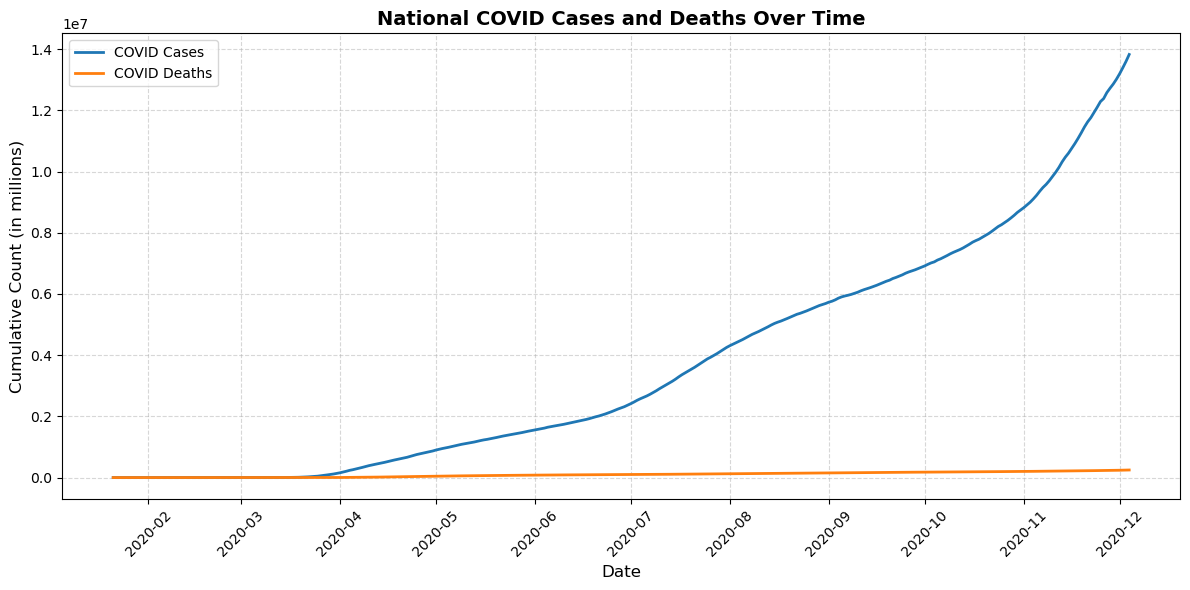

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(
    national_df['Date'],
    national_df['COVID Cases'],
    label='COVID Cases',
    linewidth=2
)

plt.plot(
    national_df['Date'],
    national_df['Total Deaths (COVID)'],
    label='COVID Deaths',
    linewidth=2
)

plt.title("National COVID Cases and Deaths Over Time", fontsize=14, weight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Count (in millions)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


### COVID Mortality Rate vs. Demographics (County-level) (cell 58)

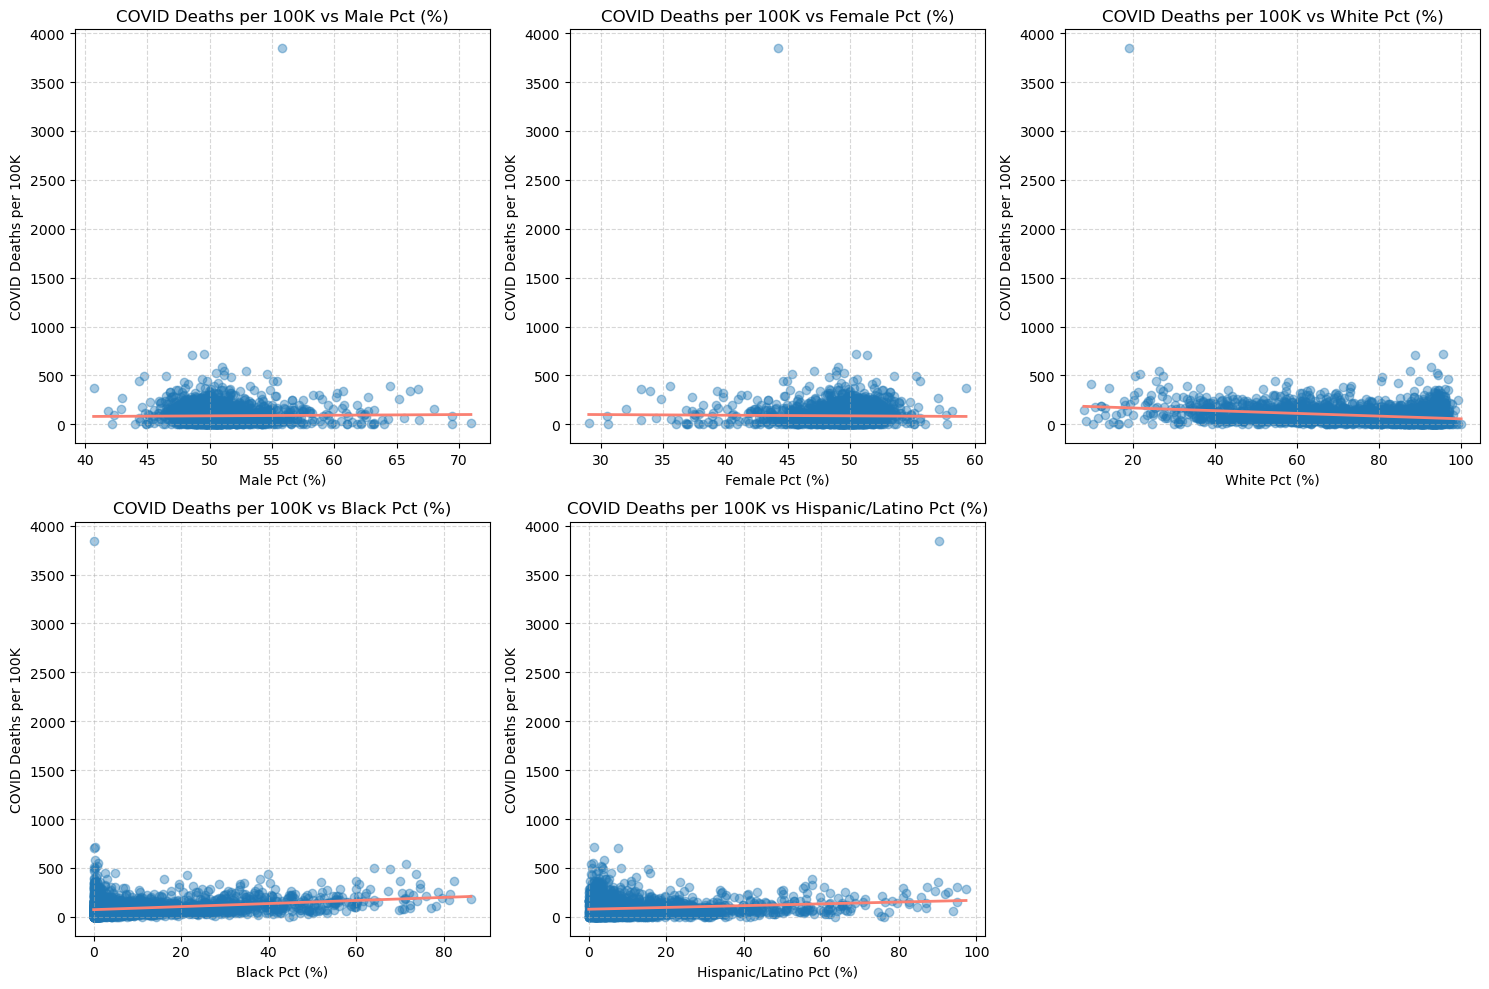

In [ ]:
demographic_columns = ['Male Pct (%)', 'Female Pct (%)', 'White Pct (%)', 'Black Pct (%)', 'Hispanic/Latino Pct (%)']
y = county_df['COVID Deaths per 100K']

plt.figure(figsize=(15, 10))

for i, col in enumerate(demographic_columns, 1):
    plt.subplot(2, 3, i)
    x = county_df[col]
    # Create scatterplots
    plt.scatter(x, y, alpha=0.4)
    # Regression line
    m, b = np.polyfit(x.dropna(), y.loc[x.dropna().index], 1)
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = m * x_line + b

    plt.plot(x_line, y_line, color='salmon', linewidth=2)
    plt.title(f"COVID Deaths per 100K vs {col}")
    plt.xlabel(col)
    plt.ylabel("COVID Deaths per 100K")
    plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

### 3. COVID Mortality and Case Rate by State (cells 63 - 65)
Here I used `subplot()` to combine 2 separate datasets found in EDA > COVID Deaths per 100K by State
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html

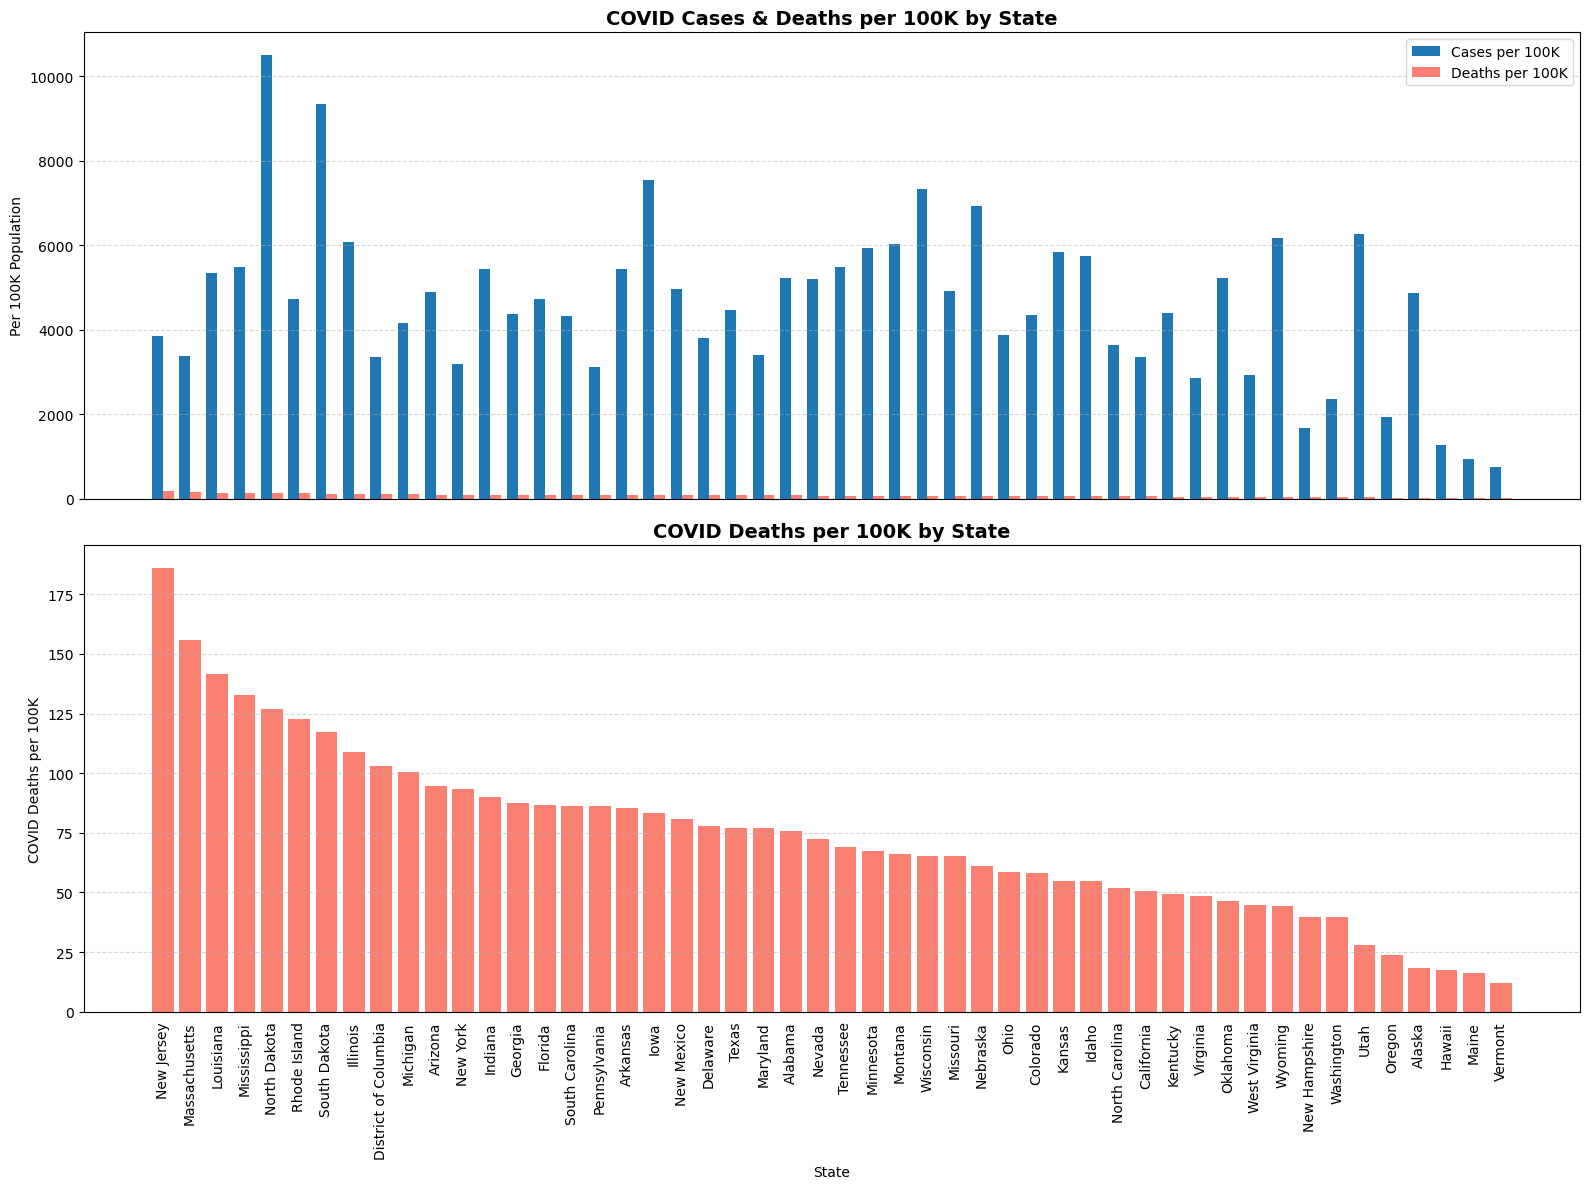

In [ ]:
# Sort by deaths so both charts use consistent order
state_df_sorted = state_df.sort_values('COVID Deaths per 100K', ascending=False)

states = state_df_sorted['State']
cases = state_df_sorted['COVID Cases per 100K']
deaths = state_df_sorted['COVID Deaths per 100K']

x = np.arange(len(states))
width = 0.4

plt.figure(figsize=(16, 12))

# Subplot 1
plt.subplot(2, 1, 1)
plt.bar(x - width/2, cases, width, label='Cases per 100K')
plt.bar(x + width/2, deaths, width, label='Deaths per 100K', color='salmon')

plt.title("COVID Cases & Deaths per 100K by State", fontsize=14, weight='bold')
plt.ylabel("Per 100K Population")
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Subplot 2
plt.subplot(2, 1, 2)
plt.bar(states, deaths, color='salmon')
plt.title("COVID Deaths per 100K by State", fontsize=14, weight='bold')
plt.tick_params(axis='x', which='both', bottom=False, rotation=90)
plt.xlabel("State")
plt.ylabel("COVID Deaths per 100K")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### 4. Correlation Heatmap (cell 68)

[[ 1.    0.45  0.1   0.02 -0.02 -0.24  0.22  0.13]
 [ 0.45  1.   -0.04  0.21 -0.21 -0.11  0.04  0.08]
 [ 0.1  -0.04  1.   -0.01  0.01  0.28  0.01 -0.41]
 [ 0.02  0.21 -0.01  1.   -1.    0.05 -0.15  0.13]
 [-0.02 -0.21  0.01 -1.    1.   -0.05  0.15 -0.13]
 [-0.24 -0.11  0.28  0.05 -0.05  1.   -0.71 -0.41]
 [ 0.22  0.04  0.01 -0.15  0.15 -0.71  1.   -0.11]
 [ 0.13  0.08 -0.41  0.13 -0.13 -0.41 -0.11  1.  ]]


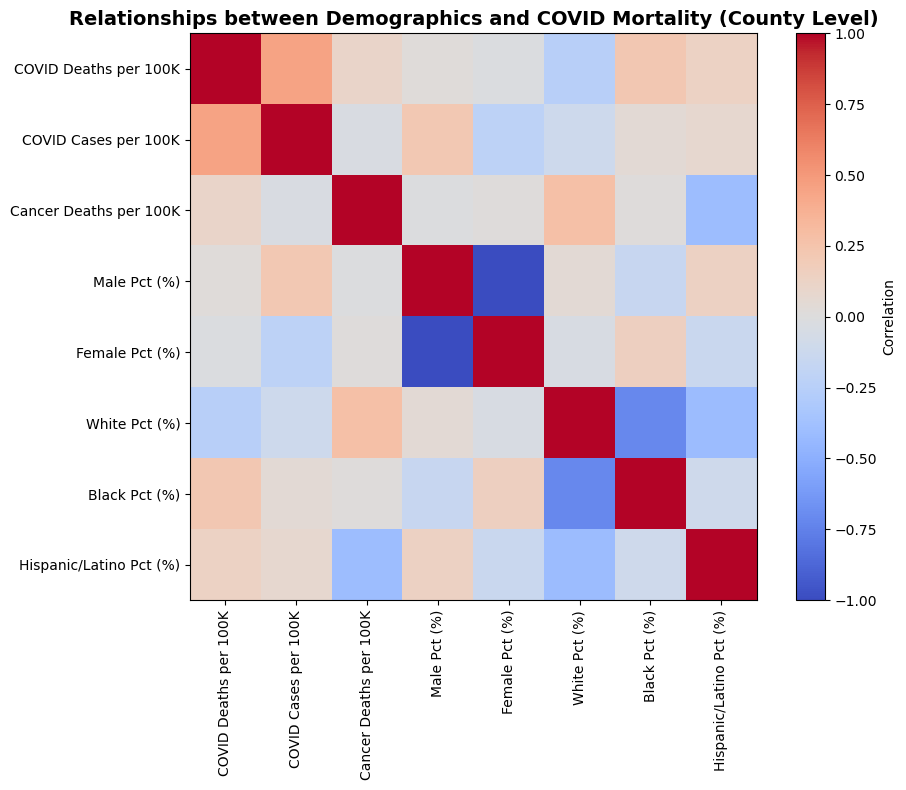

In [ ]:
import matplotlib.pyplot as plt
# List of column names used to find correlations
standardized_columns = ['COVID Deaths per 100K', 'COVID Cases per 100K', 'Cancer Deaths per 100K', 'Male Pct (%)','Female Pct (%)', 'White Pct (%)', 'Black Pct (%)', 'Hispanic/Latino Pct (%)']
# Calculate the correlation matrix
corr = county_df[standardized_columns].corr()

# Correlation matrix rounded to 2 decimal places for better readability
corr_values = corr.values.round(2)
print(corr_values)

# Heatmap plot formatting
plt.figure(figsize=(10,8))
# 'coolwarm' colormap was chosen for better visual distinction between positive and negative correlations
plt.imshow(corr, cmap='coolwarm')

plt.xticks(range(len(corr)), corr.columns, rotation=90)     # Made text vertical to avoid overlaps
plt.yticks(range(len(corr)), corr.columns)

plt.colorbar(label='Correlation')
plt.title("Relationships between Demographics and COVID Mortality (County Level)", size=14, weight='bold')
plt.tight_layout()
plt.show()

### 5. COVID Morality Rate by Cancer Morality Quartiles (cell 85)

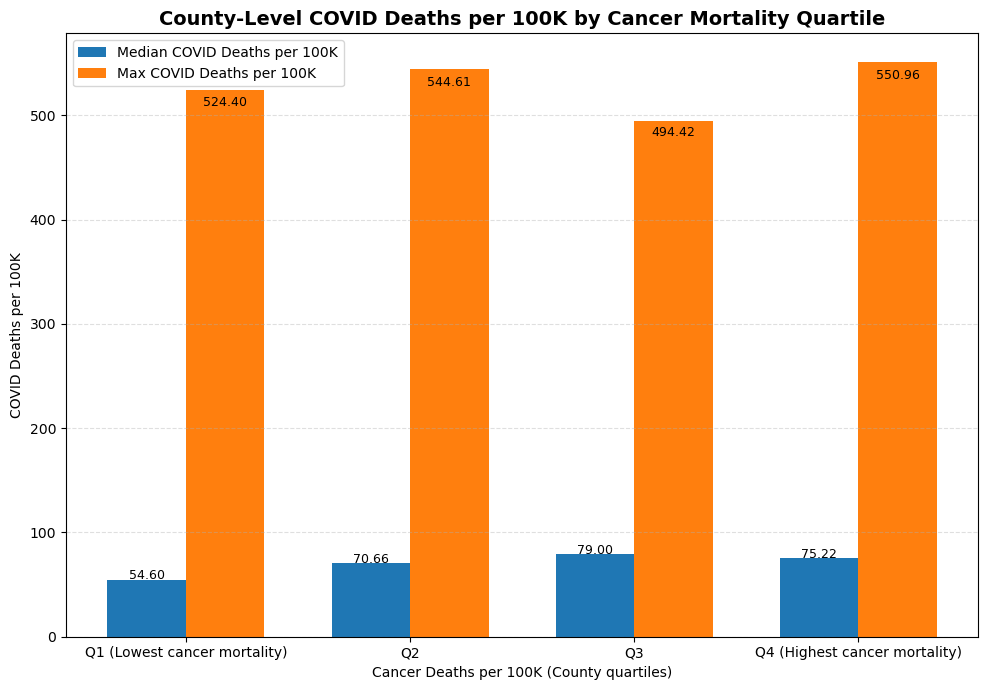

In [ ]:
quartiles = county_pivot_2.index
x = np.arange(len(quartiles))
width = 0.35

median_vals = county_pivot_2["median"]
max_vals = county_pivot_2["max"]

plt.figure(figsize=(10, 7))

median_bars = plt.bar(x - width/2, median_vals, width, label="Median COVID Deaths per 100K")
max_bars = plt.bar(x + width/2, max_vals, width, label="Max COVID Deaths per 100K")

plt.title("County-Level COVID Deaths per 100K by Cancer Mortality Quartile", fontsize=14, weight="bold")
plt.ylabel("COVID Deaths per 100K")
plt.xlabel("Cancer Deaths per 100K (County quartiles)")
plt.xticks(x, quartiles)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.4)

# Helper function to place text above bars
def add_bar_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height - (height * 0.035),   # Slightly below orange bar (max per 100K), label height adjusted by 3.5%
            f"{height:.2f}",
            ha='center',
            va='bottom',
            fontsize=9
        )

# Add labels to both bar groups
add_bar_labels(median_bars)
add_bar_labels(max_bars)

plt.tight_layout()
plt.show()

In [16]:
import time

# ---------------------------------------------------------
# SETUP: Define 'Before' and 'After' DataFrames
# ---------------------------------------------------------
# 1. The "Before" Data (Simulating the raw, unoptimized state)
# We recreate what the data looked like before you dropped columns/rows
# (Using merged_df before you applied the date filters in Cell 9)
df_heavy = uncleaned_df.copy() 

# 2. The "After" Data (Your final, optimized dataframe)
df_light = state_df.copy()

print(f"Data Size (Before): {df_heavy.shape[0]} rows x {df_heavy.shape[1]} columns")
print(f"Data Size (After):  {df_light.shape[0]} rows x {df_light.shape[1]} columns")
print("-" * 40)

# ---------------------------------------------------------
# THE TEST: Run a standard complex calculation on both
# (e.g., Grouping by County and calculating the mean of all numeric columns)
# ---------------------------------------------------------

# TEST A: Processing the Heavy Dataset
print("1. Processing Heavy Dataset...")
start_heavy = time.time()

# We force a calculation that uses all data
_ = df_heavy.describe(include='all') 

end_heavy = time.time()
time_heavy = end_heavy - start_heavy
print(f"Time Taken: {time_heavy:.4f} seconds")

# TEST B: Processing the Light (Cleaned) Dataset
print("\n2. Processing Cleaned Dataset...")
start_light = time.time()

_ = df_light.describe(include='all')

end_light = time.time()
time_light = end_light - start_light
print(f"Time Taken: {time_light:.4f} seconds")

# ---------------------------------------------------------
# RESULTS
# ---------------------------------------------------------
speedup_percent = ((time_heavy - time_light) / time_heavy) * 100
print("-" * 40)
print(f"PERFORMANCE GAIN: {speedup_percent:.2f}% FASTER")

columns_dropped = len(df_heavy.columns) - len(uncleaned_df.columns)
print(f"{columns_dropped / len(df_heavy.columns) * 100:.2f}% fewer columns after cleaning.")

NameError: name 'state_df' is not defined